In [1]:
import pandas as pd
import numpy as np

path = r"/home/anle/Analysis_CO2_Emission_Prj/eda_output_an/final_filled_area_ha_country.csv"
df = pd.read_csv(path)

In [2]:
df.shape

(6474, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6474 non-null   int64  
 1   country                                 6474 non-null   object 
 2   iso_code                                6474 non-null   object 
 3   year                                    6474 non-null   int64  
 4   ft_co2                                  5160 non-null   float64
 5   ft_hdi                                  4484 non-null   float64
 6   ft_industr_on_gdp                       4660 non-null   float64
 7   ft_deforest_area_ha                     4636 non-null   float64
 8   ft_tax                                  396 non-null    float64
 9   ft_forest_area_percent                  4830 non-null   float64
 10  ft_forest_area_sqkm                     4830 non-null   floa

In [4]:
df

,Unnamed: 0,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_tax,ft_forest_area_percent,...,ft_nonelectriccarsales,ft_globalclimatephysicalriskindexgcpri,ft_cri,ft_fossil_fuel,ft_government_expenditure_on_education,ft_environmental_protection,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy
0,0,Aruba,ABW,2000,2.378,NaN,13.175955,NaN,NaN,2.333333,...,NaN,16.952972,NaN,NaN,21.80771,NaN,18000,NaN,1.873453e+09,0.2
1,1,Aruba,ABW,2001,2.407,NaN,13.054069,NaN,NaN,2.333333,...,NaN,18.187546,NaN,NaN,21.32318,NaN,18000,NaN,1.896457e+09,0.2
2,2,Aruba,ABW,2002,2.437,NaN,13.241621,0.526108,NaN,2.333333,...,NaN,16.045400,NaN,NaN,19.75715,NaN,18000,NaN,1.961844e+09,0.2
3,3,Aruba,ABW,2003,2.561,NaN,14.892210,0.977058,NaN,2.333333,...,NaN,16.457343,NaN,NaN,NaN,NaN,18000,NaN,2.044112e+09,0.2
4,4,Aruba,ABW,2004,2.616,NaN,15.596508,NaN,NaN,2.333333,...,NaN,13.058301,NaN,NaN,14.90291,NaN,18000,NaN,2.254831e+09,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,6469,Zimbabwe,ZWE,2021,10.204,0.581,28.805586,9012.071679,NaN,44.974822,...,NaN,7.120811,NaN,43.40,NaN,NaN,39075700,32787.0,2.724051e+10,82.4
6470,6470,Zimbabwe,ZWE,2022,10.425,0.594,39.691641,8226.760713,NaN,44.855732,...,NaN,7.449997,NaN,45.28,NaN,NaN,39075700,22692.0,3.278966e+10,NaN
6471,6471,Zimbabwe,ZWE,2023,11.164,0.598,26.301060,5668.385497,NaN,NaN,...,NaN,6.005716,NaN,NaN,NaN,NaN,39075700,18637.0,3.523137e+10,NaN
6472,6472,Zimbabwe,ZWE,2024,NaN,NaN,NaN,5834.540735,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39075700,19466.0,4.418770e+10,NaN


In [5]:
df_process = df.copy()

In [6]:
df_process = df_process.drop_duplicates()
df_process = df_process.dropna(how='all')

In [7]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6474 entries, 0 to 6473
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              6474 non-null   int64  
 1   country                                 6474 non-null   object 
 2   iso_code                                6474 non-null   object 
 3   year                                    6474 non-null   int64  
 4   ft_co2                                  5160 non-null   float64
 5   ft_hdi                                  4484 non-null   float64
 6   ft_industr_on_gdp                       4660 non-null   float64
 7   ft_deforest_area_ha                     4636 non-null   float64
 8   ft_tax                                  396 non-null    float64
 9   ft_forest_area_percent                  4830 non-null   float64
 10  ft_forest_area_sqkm                     4830 non-null   floa

In [8]:
#count percentage missing in each column
df_cal_missing = df_process.isnull().sum().reset_index()
df_cal_missing.columns = ["column", "missing"]
total_row = len(df_process)
df_cal_missing['percentage'] = df_cal_missing["missing"]*100/total_row

In [9]:
df_cal_missing

,column,missing,percentage
0,Unnamed: 0,0,0.000000
1,country,0,0.000000
2,iso_code,0,0.000000
3,year,0,0.000000
4,ft_co2,1314,20.296571
5,ft_hdi,1990,30.738338
6,ft_industr_on_gdp,1814,28.019771
7,ft_deforest_area_ha,1838,28.390485
8,ft_tax,6078,93.883225
9,ft_forest_area_percent,1644,25.393883


Drop column has # missing >40%

In [10]:
df_drop_column = df_cal_missing[df_cal_missing["percentage"]>=40]
list_drop_column = df_drop_column["column"].tolist()
df_low_missing= df_cal_missing[df_cal_missing["percentage"]<40]

In [11]:
list_drop_column

['ft_tax',
 'ft_electriccarssold',
 'ft_nonelectriccarsales',
 'ft_cri',
 'ft_fossil_fuel',
 'ft_government_expenditure_on_education',
 'ft_environmental_protection']

In [12]:
df_process = df_process.drop(columns=list_drop_column)

In [13]:
df_process = df_process.dropna(subset='ft_co2')
df_process = df_process[df_process['ft_co2'] != 0]

In [14]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5120 entries, 0 to 6471
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5120 non-null   int64  
 1   country                                 5120 non-null   object 
 2   iso_code                                5120 non-null   object 
 3   year                                    5120 non-null   int64  
 4   ft_co2                                  5120 non-null   float64
 5   ft_hdi                                  4460 non-null   float64
 6   ft_industr_on_gdp                       4586 non-null   float64
 7   ft_deforest_area_ha                     4134 non-null   float64
 8   ft_forest_area_percent                  4588 non-null   float64
 9   ft_forest_area_sqkm                     4588 non-null   float64
 10  ft_population                           4896 non-null   float64
 

In [15]:
df_process.describe()

,Unnamed: 0,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_deforestation,ft_gdp,ft_renewable_energy
count,5120.000000,5120.000000,5120.000000,4460.000000,4586.000000,4.134000e+03,4588.000000,4.588000e+03,4.896000e+03,3980.000000,5.120000e+03,3.611000e+03,4.791000e+03,4521.000000
mean,3262.218750,2011.487500,149.588318,0.700752,26.059791,1.178884e+05,32.218196,2.044275e+05,3.481200e+07,14.859596,6.601042e+07,1.591198e+05,3.400788e+11,31.004424
std,1877.968904,6.925259,735.383398,0.159472,12.445340,4.713842e+05,24.289423,7.746430e+05,1.338890e+08,7.478532,1.916356e+08,5.931666e+05,1.531170e+12,29.539004
min,0.000000,2000.000000,0.004000,0.266000,2.086302,0.000000e+00,0.000000,0.000000e+00,9.544000e+03,0.000000,2.100000e+03,0.000000e+00,1.396473e+07,0.000000
25%,1611.250000,2005.000000,1.065250,0.579000,18.051982,1.913147e+02,11.049607,2.584375e+03,1.234555e+06,10.350649,1.218900e+06,1.358000e+03,4.679124e+09,5.600000
50%,3283.500000,2011.000000,7.826500,0.722000,24.111212,5.795213e+03,30.854579,2.374583e+04,6.745910e+06,14.519003,1.030000e+07,1.538600e+04,2.023702e+10,20.600000
75%,4903.250000,2017.000000,56.497500,0.826000,31.085883,4.986902e+04,50.137332,1.141550e+05,2.328961e+07,18.439119,4.786065e+07,7.620800e+04,1.362395e+11,51.700000
max,6471.000000,2023.000000,11902.503000,0.972000,86.669555,8.570166e+06,95.577213,8.153120e+06,1.438070e+09,68.372508,1.709824e+09,1.017602e+07,2.772070e+13,98.300000


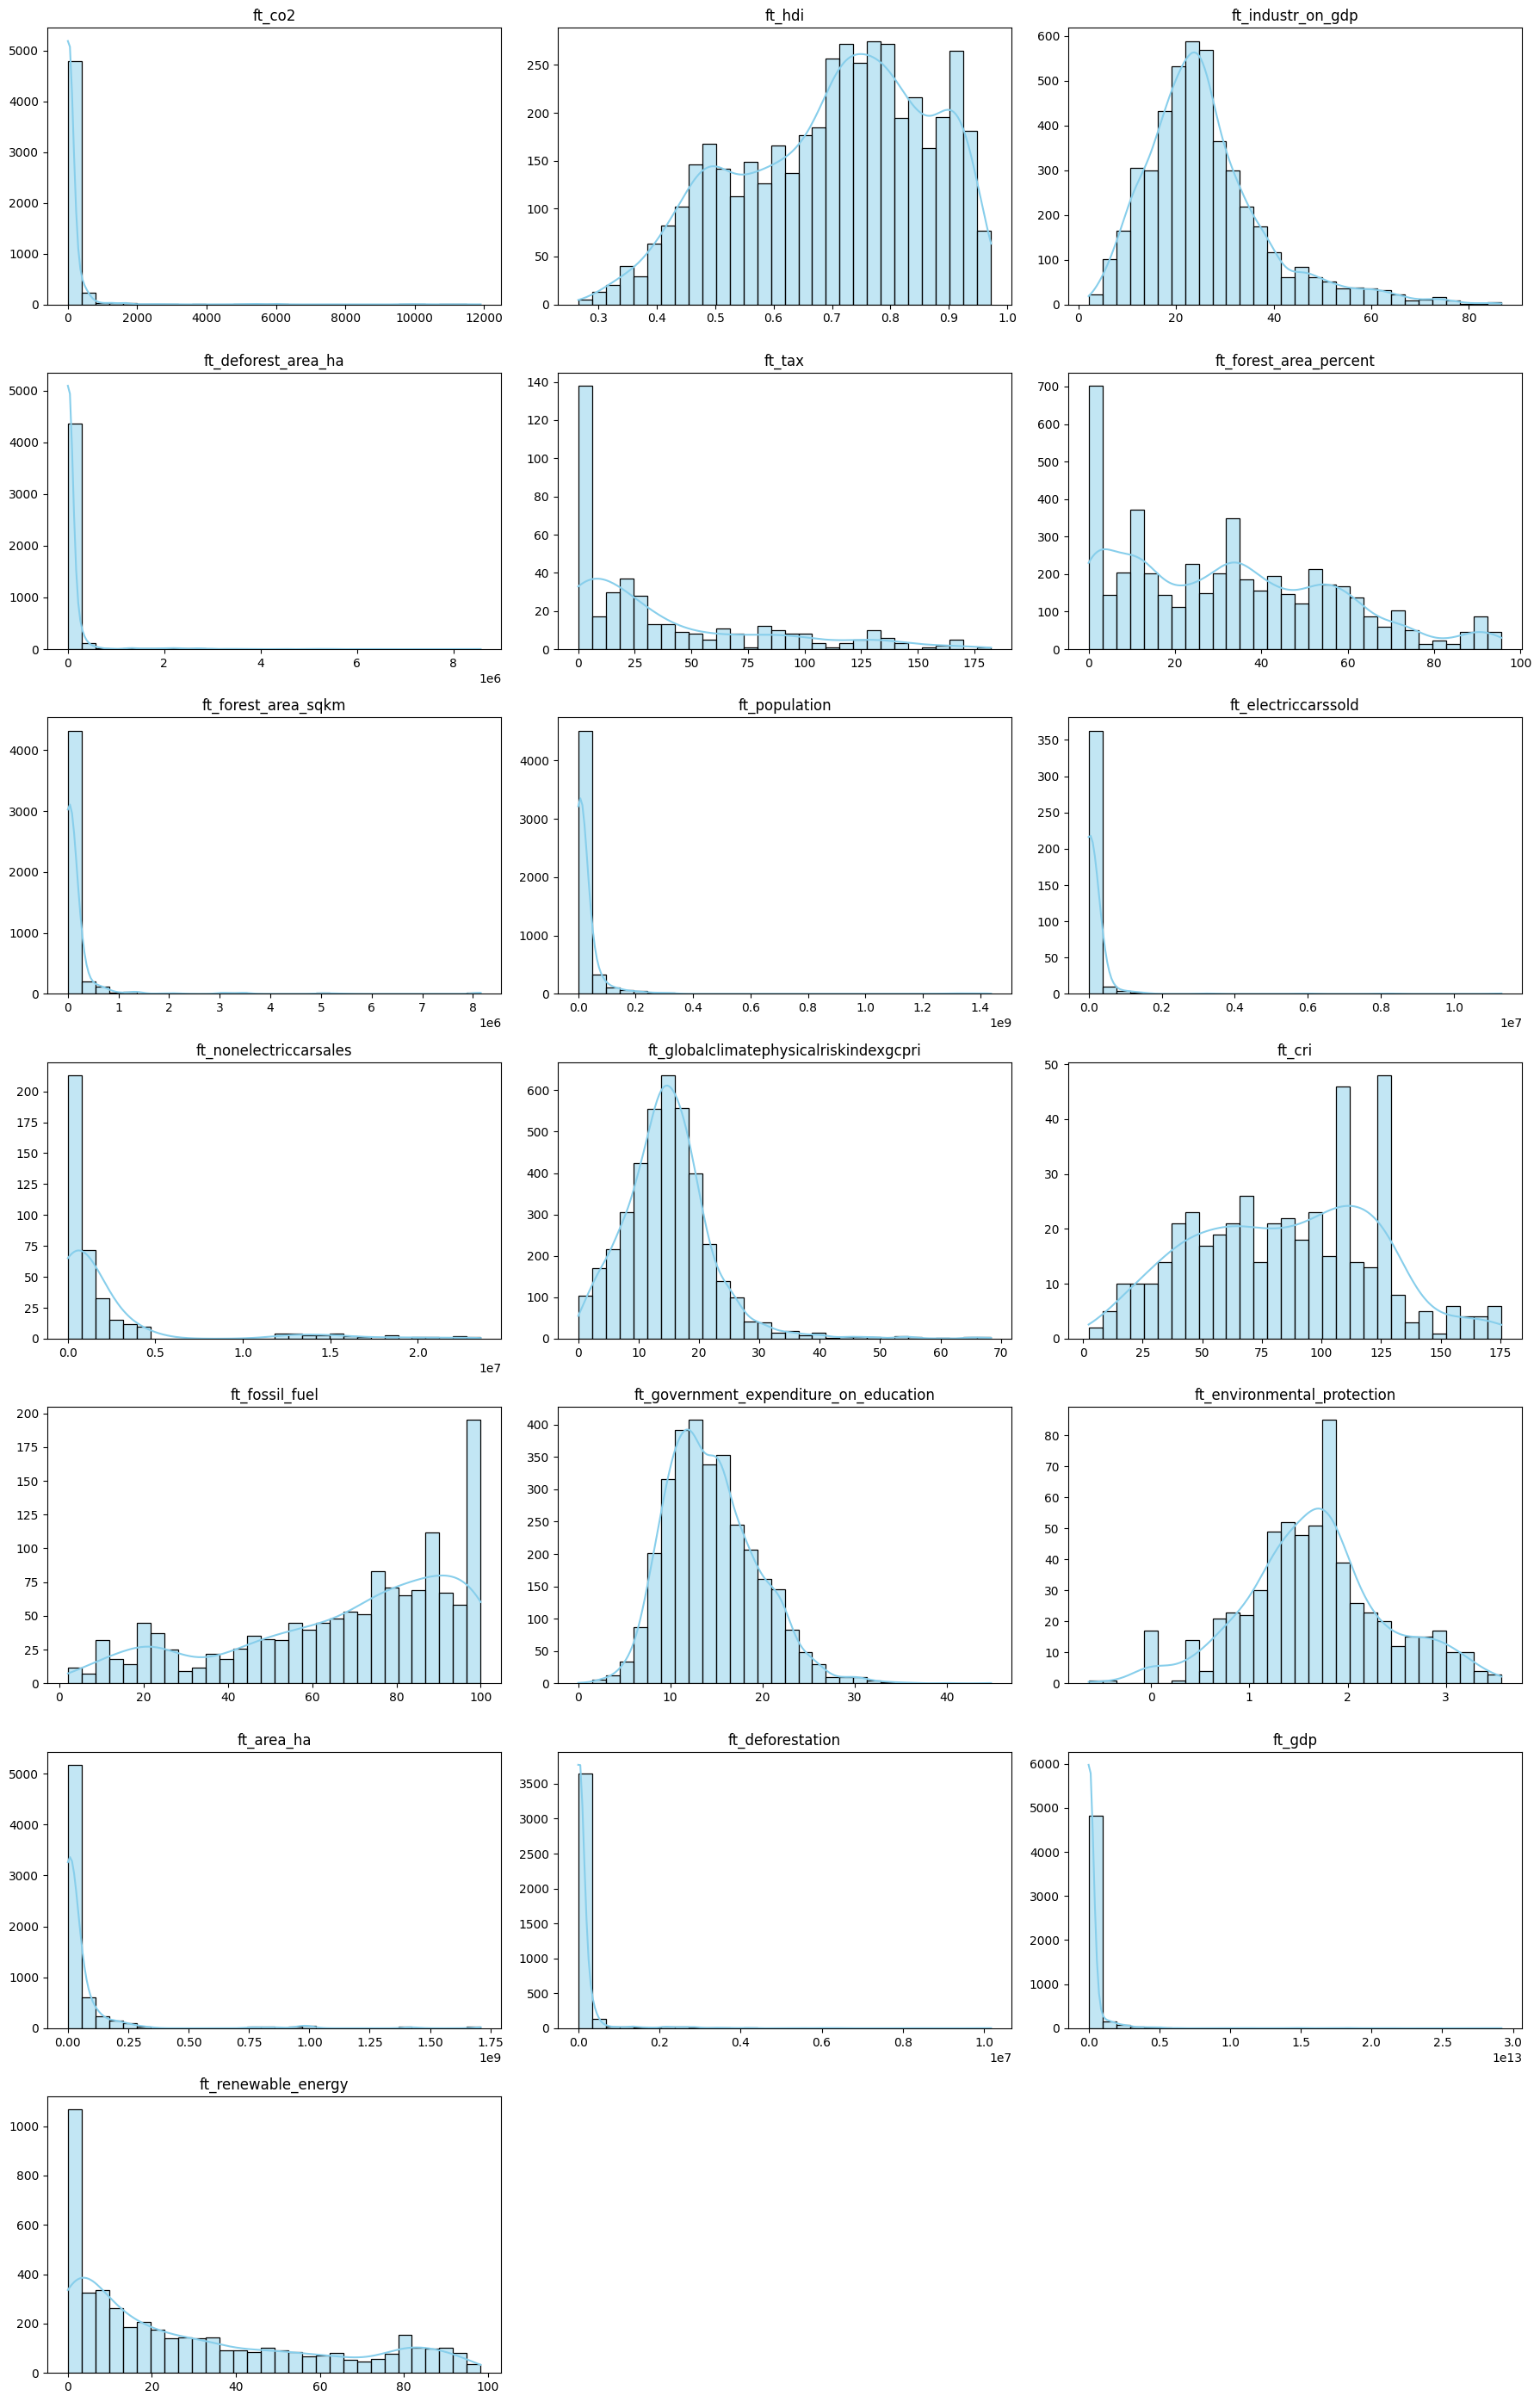

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named df
# Select only columns with prefix 'ft_'
ft_columns = [col for col in df.columns if col.startswith("ft_")]

# Set up subplots (3 columns per row for readability)
n_cols = 3
n_rows = (len(ft_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(ft_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [17]:
# Count missing values per row
df_process["missing_count"] = df_process.isnull().sum(axis=1)
print(df_process["missing_count"].describe())



count    5120.000000
mean        1.375977
std         2.240443
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        10.000000
Name: missing_count, dtype: float64


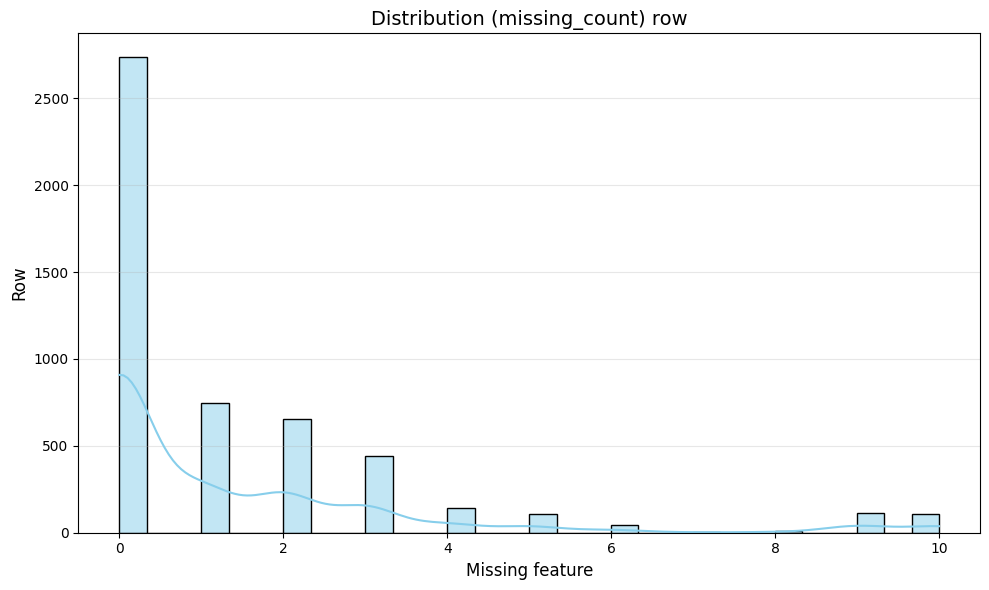

In [18]:

# Vẽ phân bố của số lượng giá trị thiếu trên mỗi hàng
plt.figure(figsize=(10, 6))
sns.histplot(df_process["missing_count"], bins=30, kde=True, color="skyblue")

plt.title("Distribution (missing_count) row", fontsize=14)
plt.xlabel("Missing feature", fontsize=12)
plt.ylabel("Row", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [19]:
df_process_cut_missing_data_country_row = df_process[df_process["missing_count"] <= 4]

In [20]:
df_process_cut_missing_data_country_row.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 6471
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4723 non-null   int64  
 1   country                                 4723 non-null   object 
 2   iso_code                                4723 non-null   object 
 3   year                                    4723 non-null   int64  
 4   ft_co2                                  4723 non-null   float64
 5   ft_hdi                                  4401 non-null   float64
 6   ft_industr_on_gdp                       4494 non-null   float64
 7   ft_deforest_area_ha                     3969 non-null   float64
 8   ft_forest_area_percent                  4542 non-null   float64
 9   ft_forest_area_sqkm                     4542 non-null   float64
 10  ft_population                           4723 non-null   float64
 

<Axes: >

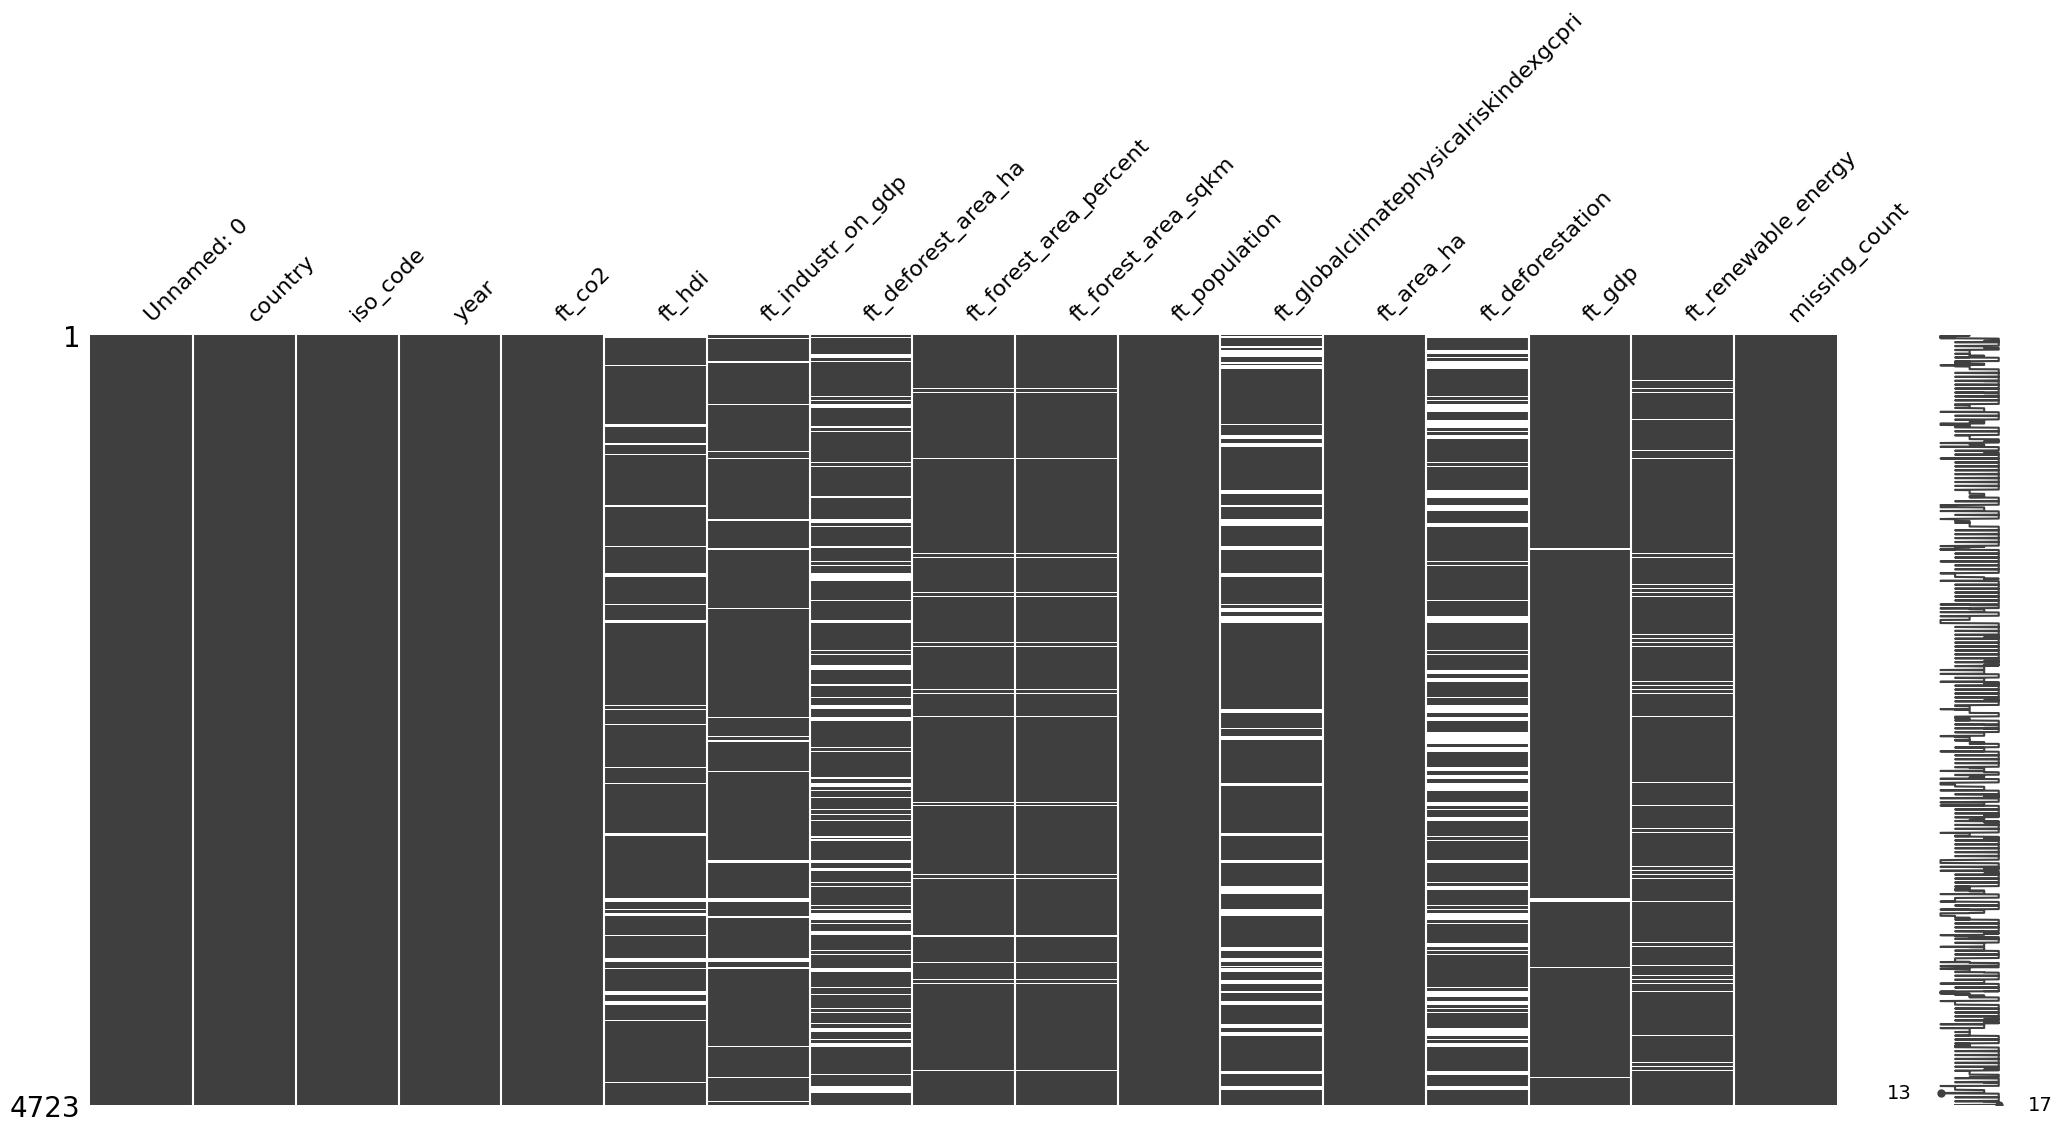

In [21]:
import missingno as msno
msno.matrix(df_process_cut_missing_data_country_row)

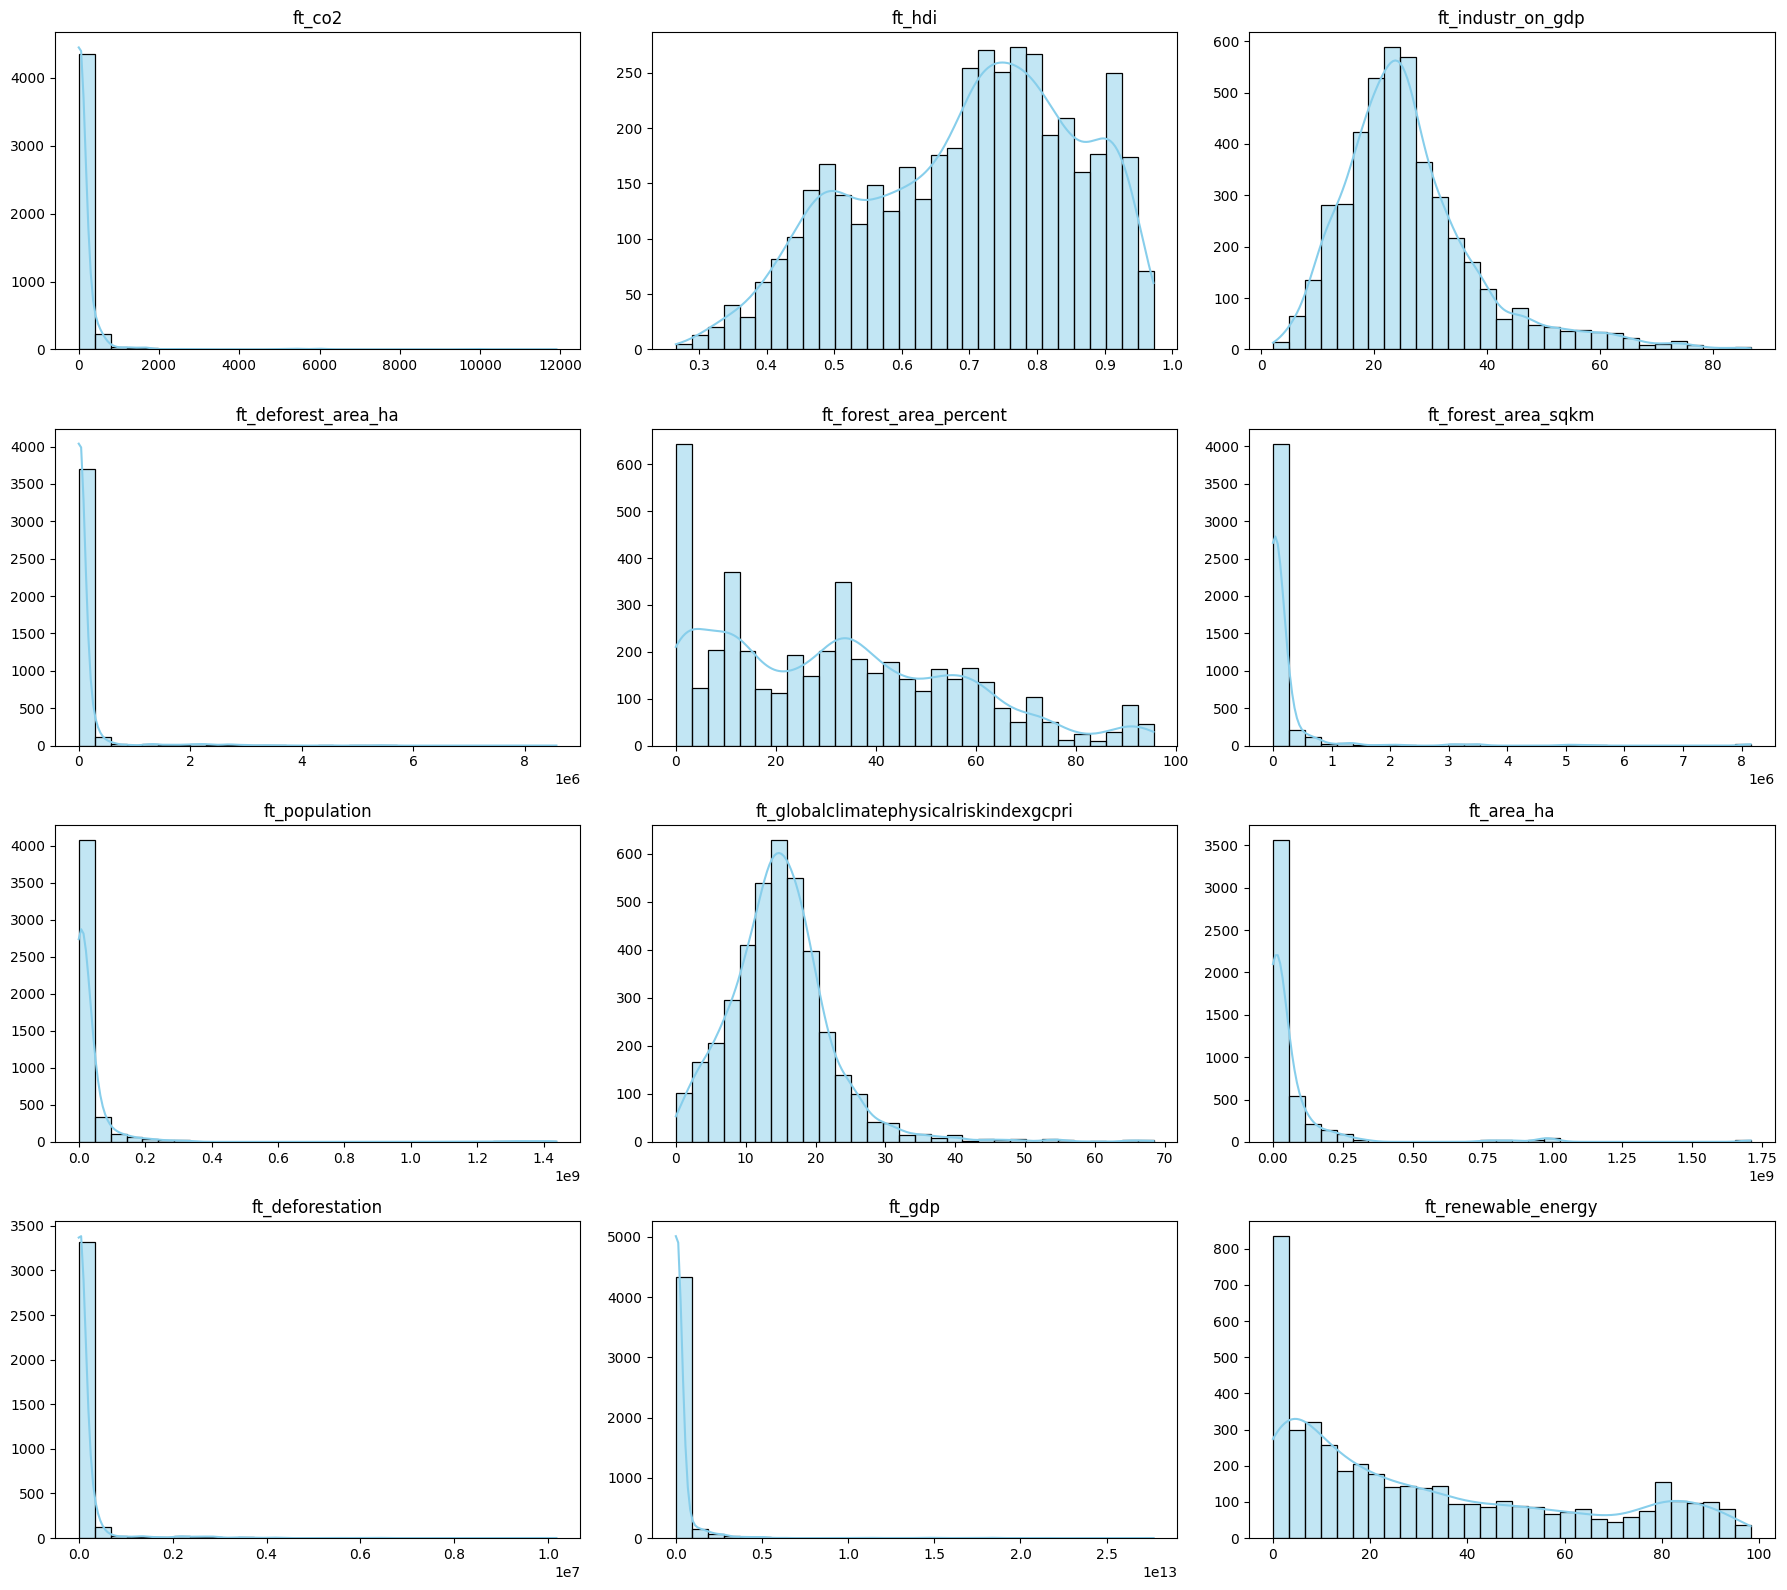

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named df
# Select only columns with prefix 'ft_'
ft_columns = [col for col in df_process_cut_missing_data_country_row.columns if col.startswith("ft_")]

# Set up subplots (3 columns per row for readability)
n_cols = 3
n_rows = (len(ft_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(ft_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_process_cut_missing_data_country_row[col], kde=True, bins=30, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [23]:
#ft_area_ha ở từng nước giá trị giống nhau:

def fill_with_mode(series):
    mode_val = series.mode()
    if not mode_val.empty:
        return series.fillna(mode_val[0])
    else:
        return series

# Áp dụng theo từng iso_code
df_process_cut_missing_data_country_row["ft_area_ha"] = (
    df_process_cut_missing_data_country_row
    .groupby("iso_code")["ft_area_ha"]
    .transform(fill_with_mode)
)

/tmp/ipykernel_782/1182750875.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_process_cut_missing_data_country_row["ft_area_ha"] = (


In [24]:
df_process_cut_missing_data_country_row.isnull().sum()

Unnamed: 0                                   0
country                                      0
iso_code                                     0
year                                         0
ft_co2                                       0
ft_hdi                                     322
ft_industr_on_gdp                          229
ft_deforest_area_ha                        754
ft_forest_area_percent                     181
ft_forest_area_sqkm                        181
ft_population                                0
ft_globalclimatephysicalriskindexgcpri     795
ft_area_ha                                   0
ft_deforestation                          1133
ft_gdp                                      55
ft_renewable_energy                        304
missing_count                                0
dtype: int64

In [25]:
#drop do trùng ft_deforestation và ft_deforest_area_ha nhưng ft_deforestation missing nhiều hơn
df_merged = df_process_cut_missing_data_country_row.drop(columns='ft_deforestation')

In [26]:
df_merged.isnull().sum()

Unnamed: 0                                  0
country                                     0
iso_code                                    0
year                                        0
ft_co2                                      0
ft_hdi                                    322
ft_industr_on_gdp                         229
ft_deforest_area_ha                       754
ft_forest_area_percent                    181
ft_forest_area_sqkm                       181
ft_population                               0
ft_globalclimatephysicalriskindexgcpri    795
ft_area_ha                                  0
ft_gdp                                     55
ft_renewable_energy                       304
missing_count                               0
dtype: int64

In [27]:
df_merged.describe()

,Unnamed: 0,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_gdp,ft_renewable_energy,missing_count
count,4723.000000,4723.000000,4723.000000,4401.000000,4494.000000,3.969000e+03,4542.000000,4.542000e+03,4.723000e+03,3928.000000,4.723000e+03,4.668000e+03,4419.000000,4723.000000
mean,3226.006775,2011.469828,160.400194,0.699463,26.328912,1.227374e+05,32.323497,2.064633e+05,3.597962e+07,14.908543,6.870548e+07,3.472808e+11,31.603372,0.837180
std,1853.366541,6.837969,764.454775,0.159187,12.341785,4.804706e+05,24.338079,7.782897e+05,1.361727e+08,7.485533,1.906277e+08,1.550453e+12,29.542468,1.157795
min,0.000000,2000.000000,0.007000,0.266000,2.086302,0.000000e+00,0.000000,0.000000e+00,9.544000e+03,0.000000,2.100000e+03,1.396473e+07,0.000000,0.000000
25%,1618.500000,2006.000000,1.752000,0.578000,18.419088,3.079432e+02,11.054339,2.798300e+03,1.364895e+06,10.408778,2.104100e+06,4.905338e+09,6.300000,0.000000
50%,3218.000000,2012.000000,9.555000,0.721000,24.305953,7.117382e+03,31.042294,2.469320e+04,7.160005e+06,14.585450,1.176000e+07,2.060564e+10,21.600000,0.000000
75%,4802.500000,2017.000000,60.534500,0.824000,31.247978,5.491328e+04,50.567080,1.206262e+05,2.453695e+07,18.505431,5.205440e+07,1.375878e+11,52.650000,2.000000
max,6471.000000,2023.000000,11902.503000,0.972000,86.669555,8.570166e+06,95.577213,8.153120e+06,1.438070e+09,68.372508,1.709824e+09,2.772070e+13,98.300000,4.000000


<Axes: >

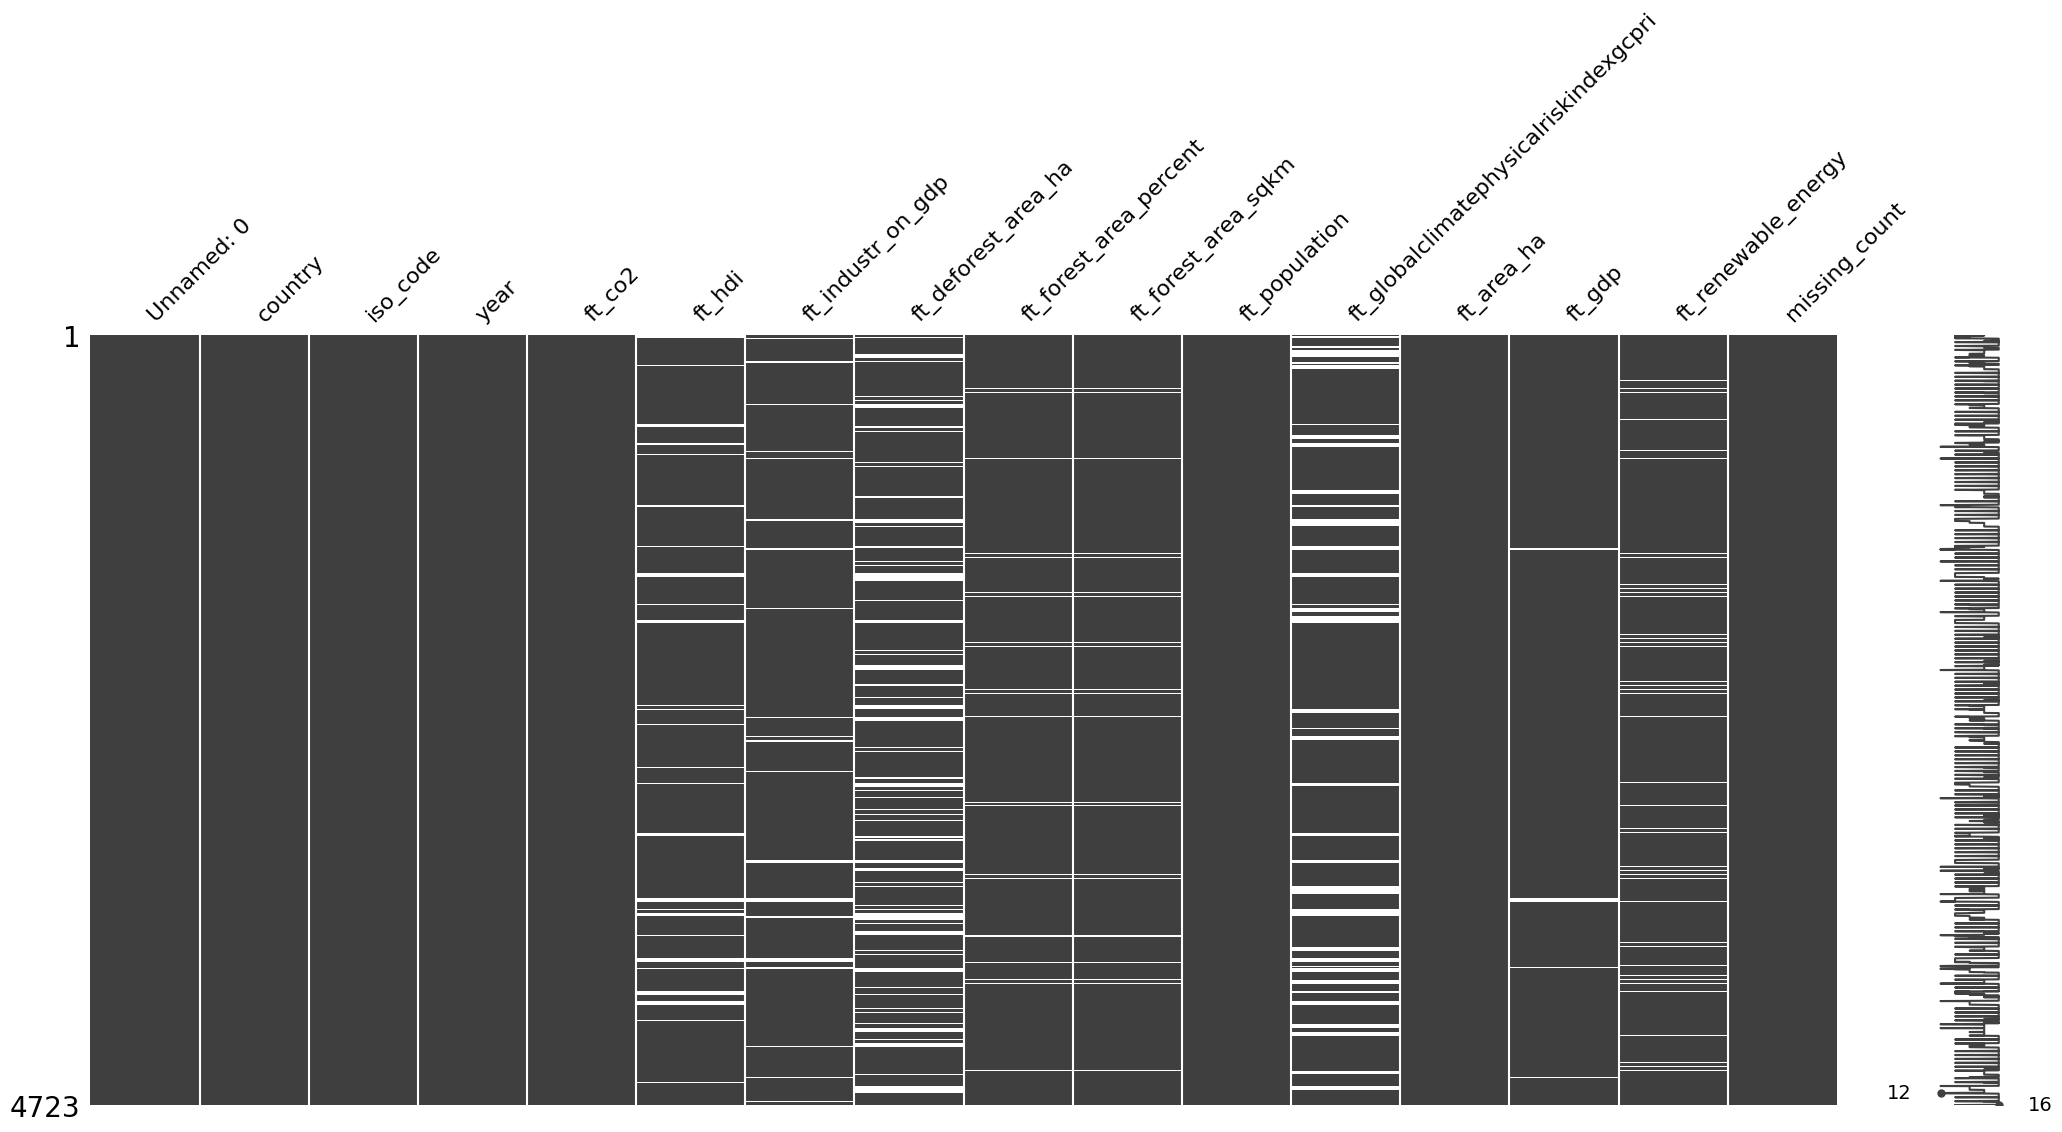

In [28]:
import missingno as msno
msno.matrix(df_merged)

In [29]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 6471
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              4723 non-null   int64  
 1   country                                 4723 non-null   object 
 2   iso_code                                4723 non-null   object 
 3   year                                    4723 non-null   int64  
 4   ft_co2                                  4723 non-null   float64
 5   ft_hdi                                  4401 non-null   float64
 6   ft_industr_on_gdp                       4494 non-null   float64
 7   ft_deforest_area_ha                     3969 non-null   float64
 8   ft_forest_area_percent                  4542 non-null   float64
 9   ft_forest_area_sqkm                     4542 non-null   float64
 10  ft_population                           4723 non-null   float64
 

In [30]:
df_merged

,Unnamed: 0,country,iso_code,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_gdp,ft_renewable_energy,missing_count
0,0,Aruba,ABW,2000,2.378,NaN,13.175955,NaN,2.333333,4.2,90588.0,16.952972,18000,1.873453e+09,0.2,3
1,1,Aruba,ABW,2001,2.407,NaN,13.054069,NaN,2.333333,4.2,91439.0,18.187546,18000,1.896457e+09,0.2,3
2,2,Aruba,ABW,2002,2.437,NaN,13.241621,0.526108,2.333333,4.2,92074.0,16.045400,18000,1.961844e+09,0.2,2
3,3,Aruba,ABW,2003,2.561,NaN,14.892210,0.977058,2.333333,4.2,93128.0,16.457343,18000,2.044112e+09,0.2,2
4,4,Aruba,ABW,2004,2.616,NaN,15.596508,NaN,2.333333,4.2,95138.0,13.058301,18000,2.254831e+09,0.2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,6467,Zimbabwe,ZWE,2019,10.263,0.584,32.025943,11514.478630,45.213002,174906.5,15271368.0,5.673413,39075700,2.571566e+10,81.0,0
6468,6468,Zimbabwe,ZWE,2020,8.495,0.582,32.767518,6200.712494,45.093912,174445.8,15526888.0,2.340203,39075700,2.686856e+10,84.1,0
6469,6469,Zimbabwe,ZWE,2021,10.204,0.581,28.805586,9012.071679,44.974822,173985.1,15797210.0,7.120811,39075700,2.724051e+10,82.4,0
6470,6470,Zimbabwe,ZWE,2022,10.425,0.594,39.691641,8226.760713,44.855732,173524.4,16069056.0,7.449997,39075700,3.278966e+10,NaN,1


In [31]:
df_merged = df_merged.drop(columns= ['Unnamed: 0','missing_count'])

In [32]:
cat_cols=df_merged.select_dtypes(include=['object']).columns
num_cols = df_merged.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['country', 'iso_code'], dtype='object')
Numerical Variables:
['year', 'ft_co2', 'ft_hdi', 'ft_industr_on_gdp', 'ft_deforest_area_ha', 'ft_forest_area_percent', 'ft_forest_area_sqkm', 'ft_population', 'ft_globalclimatephysicalriskindexgcpri', 'ft_area_ha', 'ft_gdp', 'ft_renewable_energy']


year
Skew : -0.01


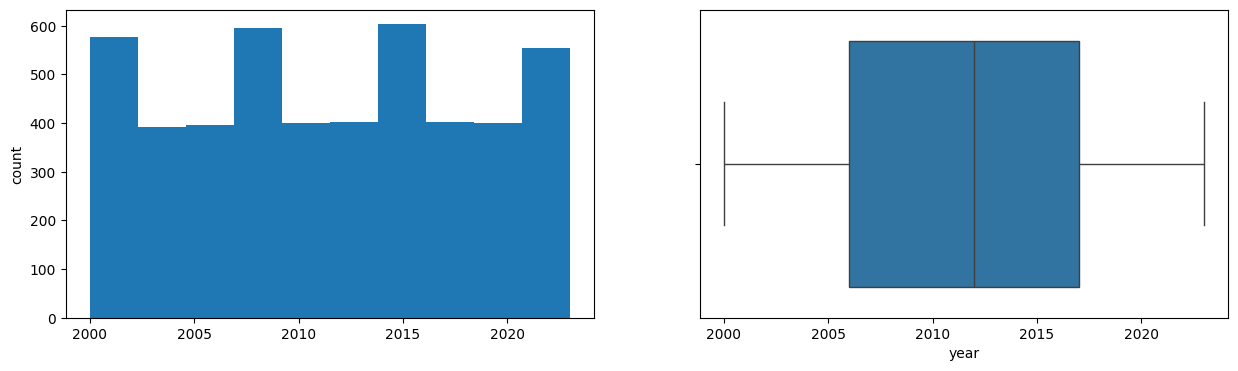

ft_co2
Skew : 9.97


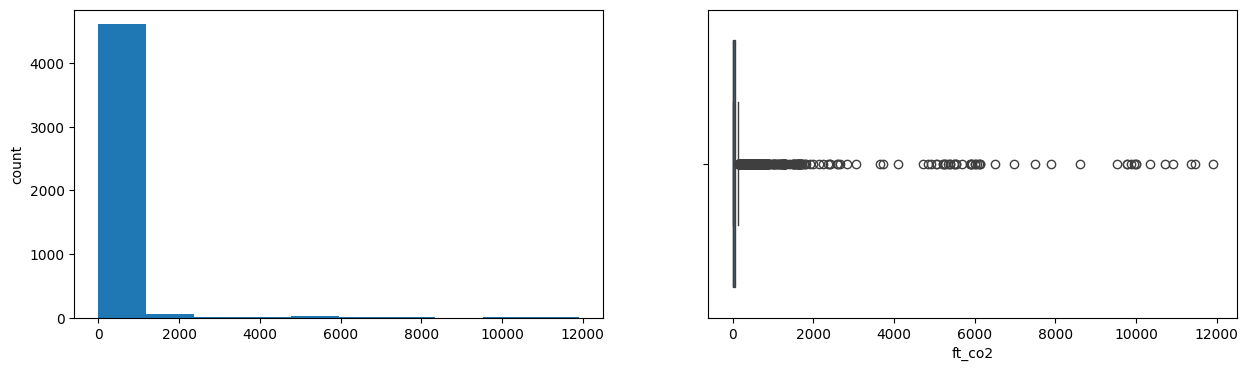

ft_hdi
Skew : -0.37


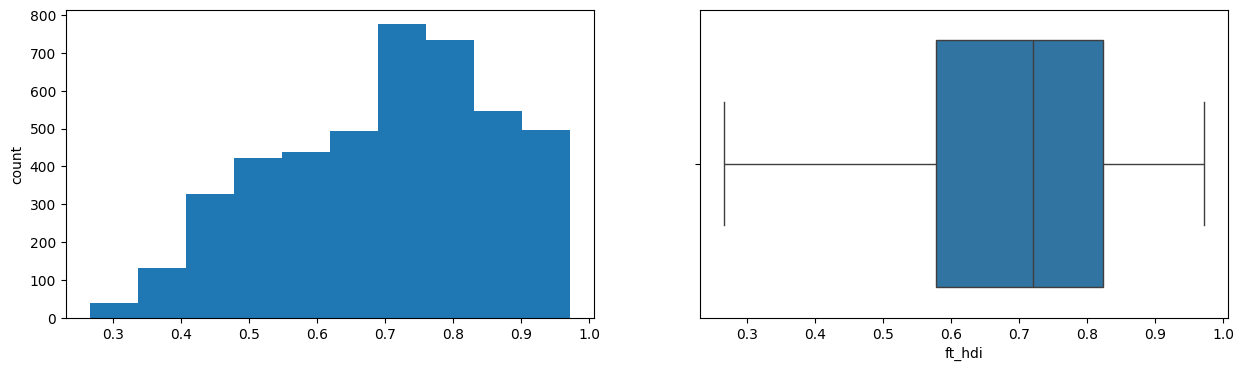

ft_industr_on_gdp
Skew : 1.36


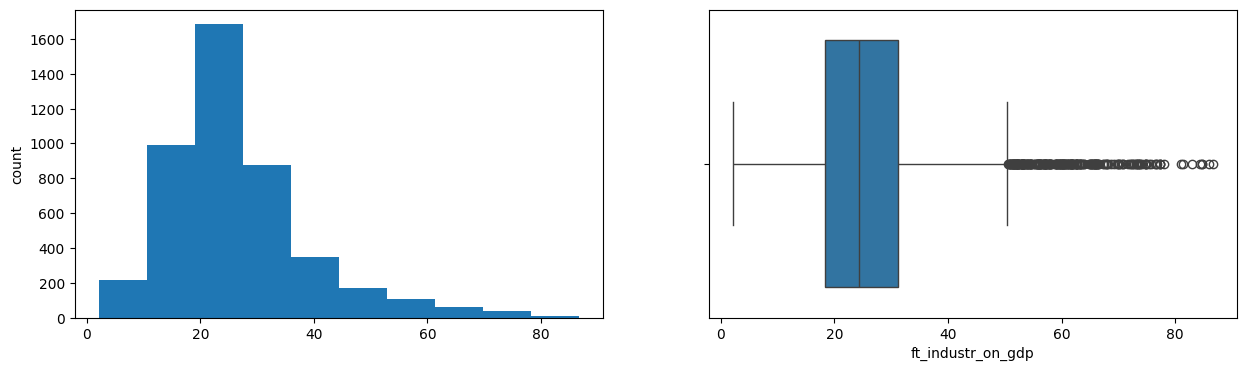

ft_deforest_area_ha
Skew : 7.52


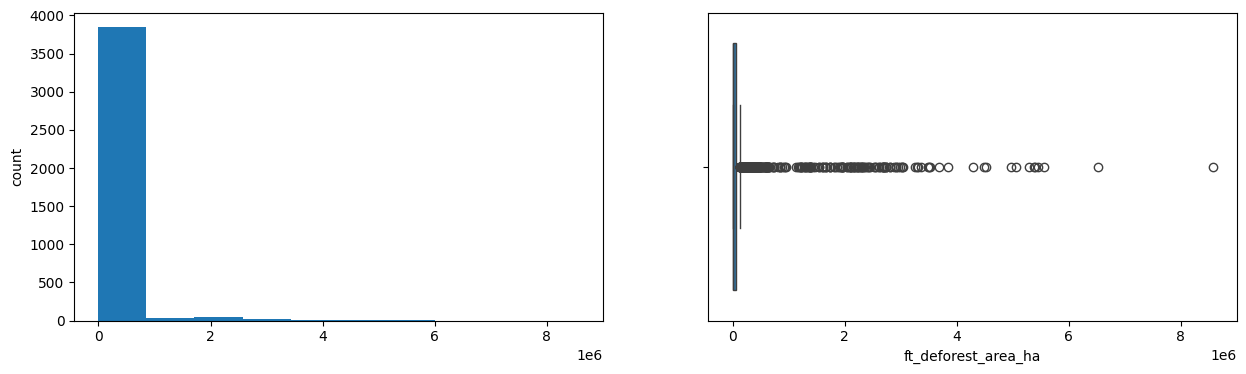

ft_forest_area_percent
Skew : 0.53


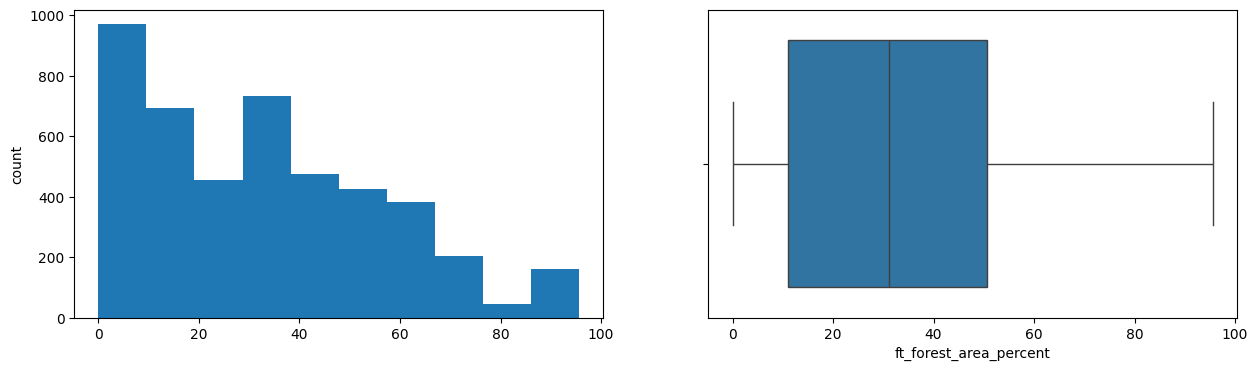

ft_forest_area_sqkm
Skew : 7.4


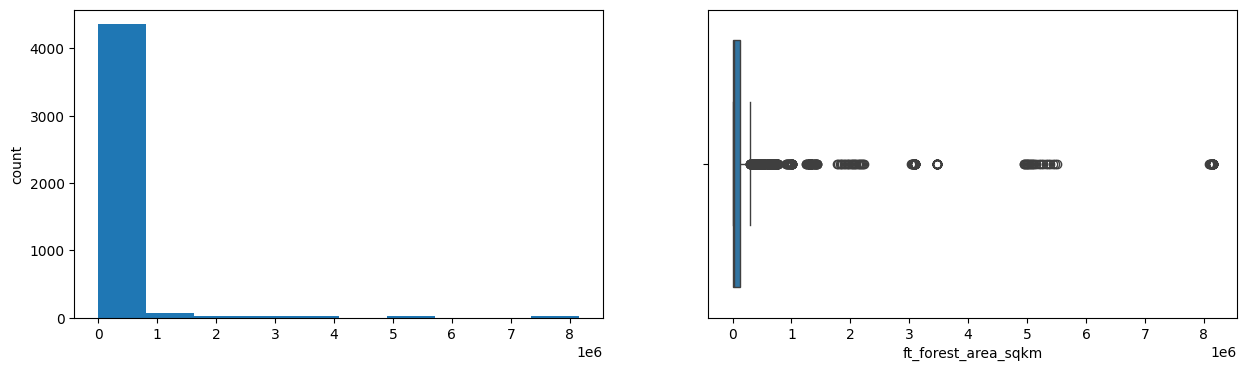

ft_population
Skew : 8.49


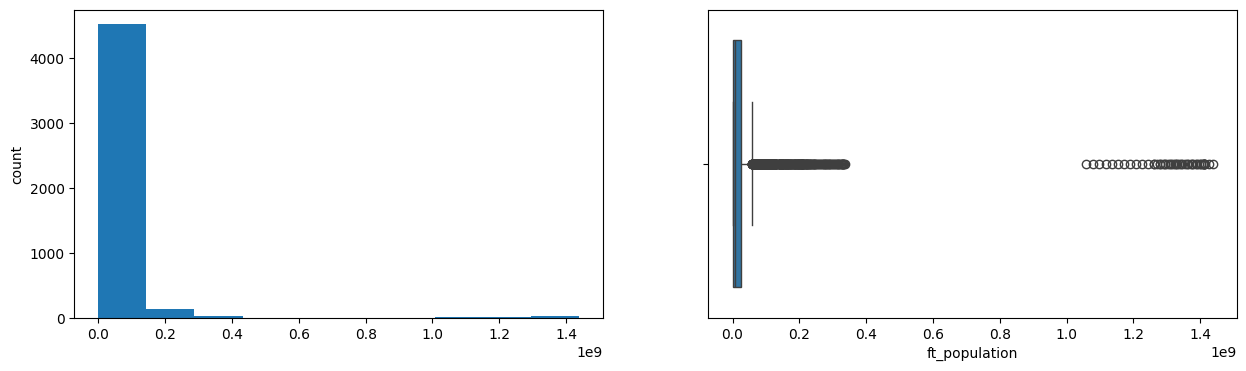

ft_globalclimatephysicalriskindexgcpri
Skew : 1.45


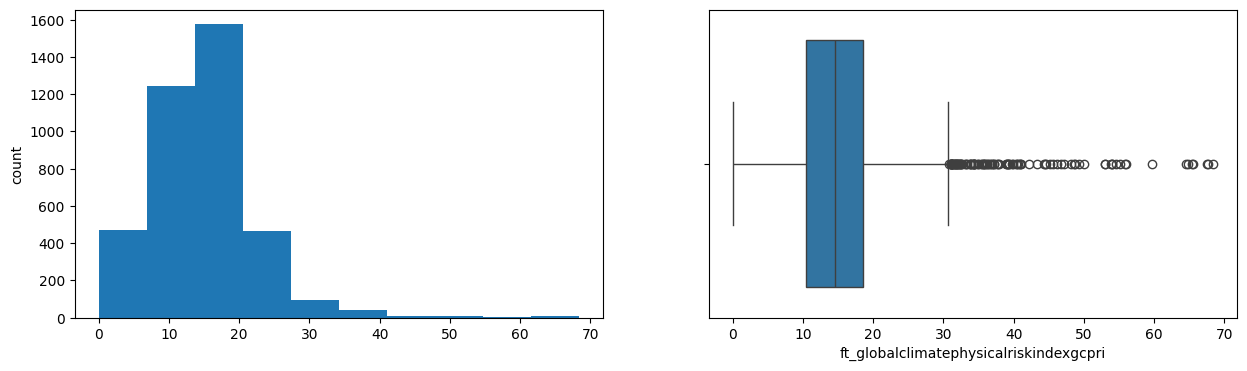

ft_area_ha
Skew : 5.54


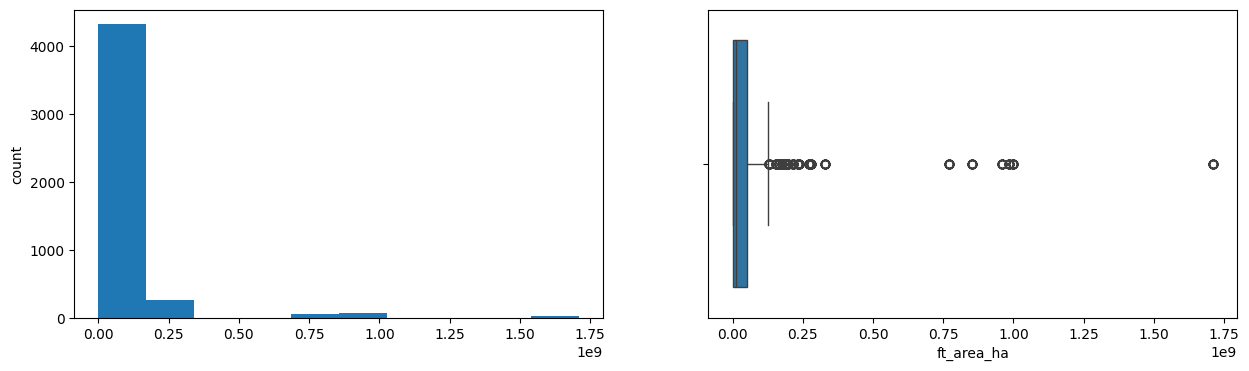

ft_gdp
Skew : 10.03


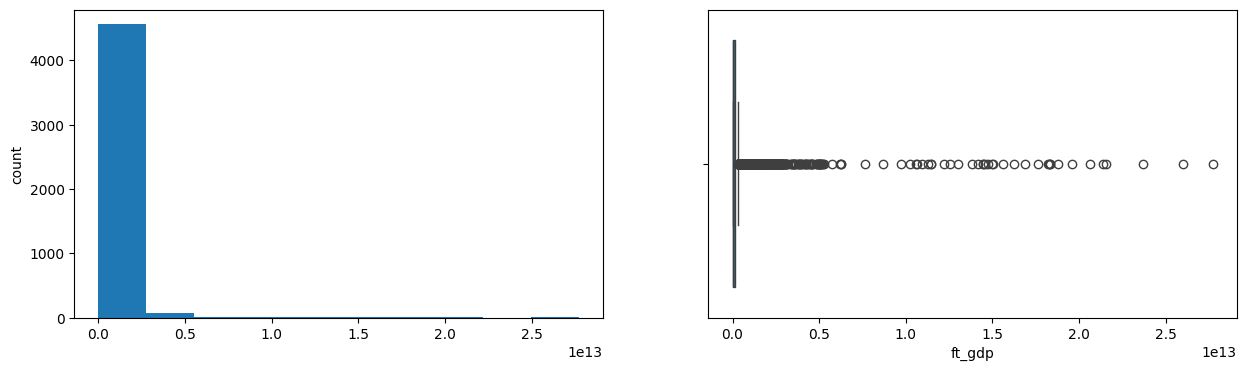

ft_renewable_energy
Skew : 0.74


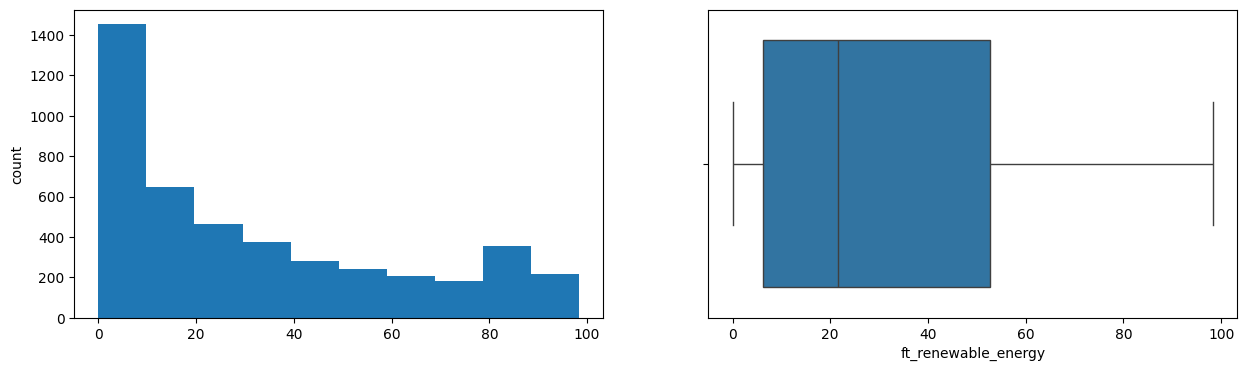

In [33]:
for col in num_cols:
    print(col)
    print('Skew :', round(df_merged[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_merged[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_merged[col])
    plt.show()

In [34]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 6471
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4723 non-null   object 
 1   iso_code                                4723 non-null   object 
 2   year                                    4723 non-null   int64  
 3   ft_co2                                  4723 non-null   float64
 4   ft_hdi                                  4401 non-null   float64
 5   ft_industr_on_gdp                       4494 non-null   float64
 6   ft_deforest_area_ha                     3969 non-null   float64
 7   ft_forest_area_percent                  4542 non-null   float64
 8   ft_forest_area_sqkm                     4542 non-null   float64
 9   ft_population                           4723 non-null   float64
 10  ft_globalclimatephysicalriskindexgcpri  3928 non-null   float64
 

In [ ]:
import pandas as pd
import numpy as np

# Tạo một bản sao để thao tác, giữ lại DataFrame gốc
df_imputed = df_merged.copy()

# 1. Xác định các cột dạng số có giá trị thiếu
# Lấy danh sách tất cả các cột có giá trị thiếu
cols_with_missing = ['ft_forest_area_sqkm','ft_forest_area_percent','ft_deforest_area_ha']
# Chỉ giữ lại các cột là kiểu số từ danh sách trên
numeric_cols_to_fill = [col for col in cols_with_missing if df_imputed[col].dtype in ['float64', 'int64']]

print(f"Các cột sẽ được lấp đầy: {numeric_cols_to_fill}")

# 2. Lặp qua từng cột và lấp đầy giá trị thiếu
for col in numeric_cols_to_fill:
    df_imputed[col] = df_imputed[col].fillna(df_imputed.groupby('country')[col].transform('median'))

# 4. Kiểm tra lại kết quả
print("\nSố lượng giá trị thiếu sau khi xử lý:")
print(df_imputed.isnull().sum())

Các cột sẽ được lấp đầy: ['ft_forest_area_sqkm', 'ft_forest_area_percent', 'ft_deforest_area_ha']

Số lượng giá trị thiếu sau khi xử lý:
country                                     0
iso_code                                    0
year                                        0
ft_co2                                      0
ft_hdi                                    322
ft_industr_on_gdp                         229
ft_deforest_area_ha                       330
ft_forest_area_percent                      0
ft_forest_area_sqkm                         0
ft_population                               0
ft_globalclimatephysicalriskindexgcpri    795
ft_area_ha                                  0
ft_gdp                                     55
ft_renewable_energy                       304
dtype: int64


In [36]:
df_imputed = df_imputed.dropna(subset= 'ft_deforest_area_ha')

In [37]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4393 entries, 0 to 6471
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4393 non-null   object 
 1   iso_code                                4393 non-null   object 
 2   year                                    4393 non-null   int64  
 3   ft_co2                                  4393 non-null   float64
 4   ft_hdi                                  4146 non-null   float64
 5   ft_industr_on_gdp                       4232 non-null   float64
 6   ft_deforest_area_ha                     4393 non-null   float64
 7   ft_forest_area_percent                  4393 non-null   float64
 8   ft_forest_area_sqkm                     4393 non-null   float64
 9   ft_population                           4393 non-null   float64
 10  ft_globalclimatephysicalriskindexgcpri  3749 non-null   float64
 

In [38]:
df_filled_missing = df_imputed.fillna(df_imputed.median(numeric_only=True))

In [39]:
df_filled_missing.to_csv(r"/home/anle/Analysis_CO2_Emission_Prj/eda_output_an/output.csv", index=False)

# Phân tích Đơn biến (Univariate Analysis)

In [40]:
df_filled_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4393 entries, 0 to 6471
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 4393 non-null   object 
 1   iso_code                                4393 non-null   object 
 2   year                                    4393 non-null   int64  
 3   ft_co2                                  4393 non-null   float64
 4   ft_hdi                                  4393 non-null   float64
 5   ft_industr_on_gdp                       4393 non-null   float64
 6   ft_deforest_area_ha                     4393 non-null   float64
 7   ft_forest_area_percent                  4393 non-null   float64
 8   ft_forest_area_sqkm                     4393 non-null   float64
 9   ft_population                           4393 non-null   float64
 10  ft_globalclimatephysicalriskindexgcpri  4393 non-null   float64
 

In [41]:
df_filled_missing.shape

(4393, 14)

In [42]:
df_filled_missing.describe()

,year,ft_co2,ft_hdi,ft_industr_on_gdp,ft_deforest_area_ha,ft_forest_area_percent,ft_forest_area_sqkm,ft_population,ft_globalclimatephysicalriskindexgcpri,ft_area_ha,ft_gdp,ft_renewable_energy
count,4393.000000,4393.00000,4393.000000,4393.000000,4.393000e+03,4393.000000,4.393000e+03,4.393000e+03,4393.000000,4.393000e+03,4.393000e+03,4393.000000
mean,2011.482358,171.33463,0.700650,26.415809,1.153691e+05,33.730535,2.231497e+05,3.850169e+07,14.799256,7.252716e+07,3.676533e+11,32.156442
std,6.864564,791.53479,0.155151,11.769375,4.651325e+05,23.936312,8.060282e+05,1.408602e+08,6.652619,1.966110e+08,1.596002e+12,28.792596
min,2000.000000,0.05100,0.266000,2.086302,0.000000e+00,0.007790,7.000000e-01,1.764800e+04,0.000000,3.400000e+03,7.595113e+07,0.000000
25%,2006.000000,2.19200,0.586000,19.302424,1.234884e+02,12.070666,4.860800e+03,2.194654e+06,11.368346,2.805100e+06,6.166864e+09,8.200000
50%,2012.000000,10.43900,0.723000,24.563954,5.213877e+03,32.381258,2.860016e+04,8.484550e+06,14.581926,1.431000e+07,2.314157e+10,23.050000
75%,2017.000000,64.05200,0.817000,30.916284,4.845513e+04,50.935065,1.330911e+05,2.648262e+07,17.640269,5.817300e+07,1.648730e+11,51.700000
max,2023.000000,11902.50300,0.970000,86.669555,8.570166e+06,95.577213,8.153120e+06,1.438070e+09,68.372508,1.709824e+09,2.772070e+13,98.300000


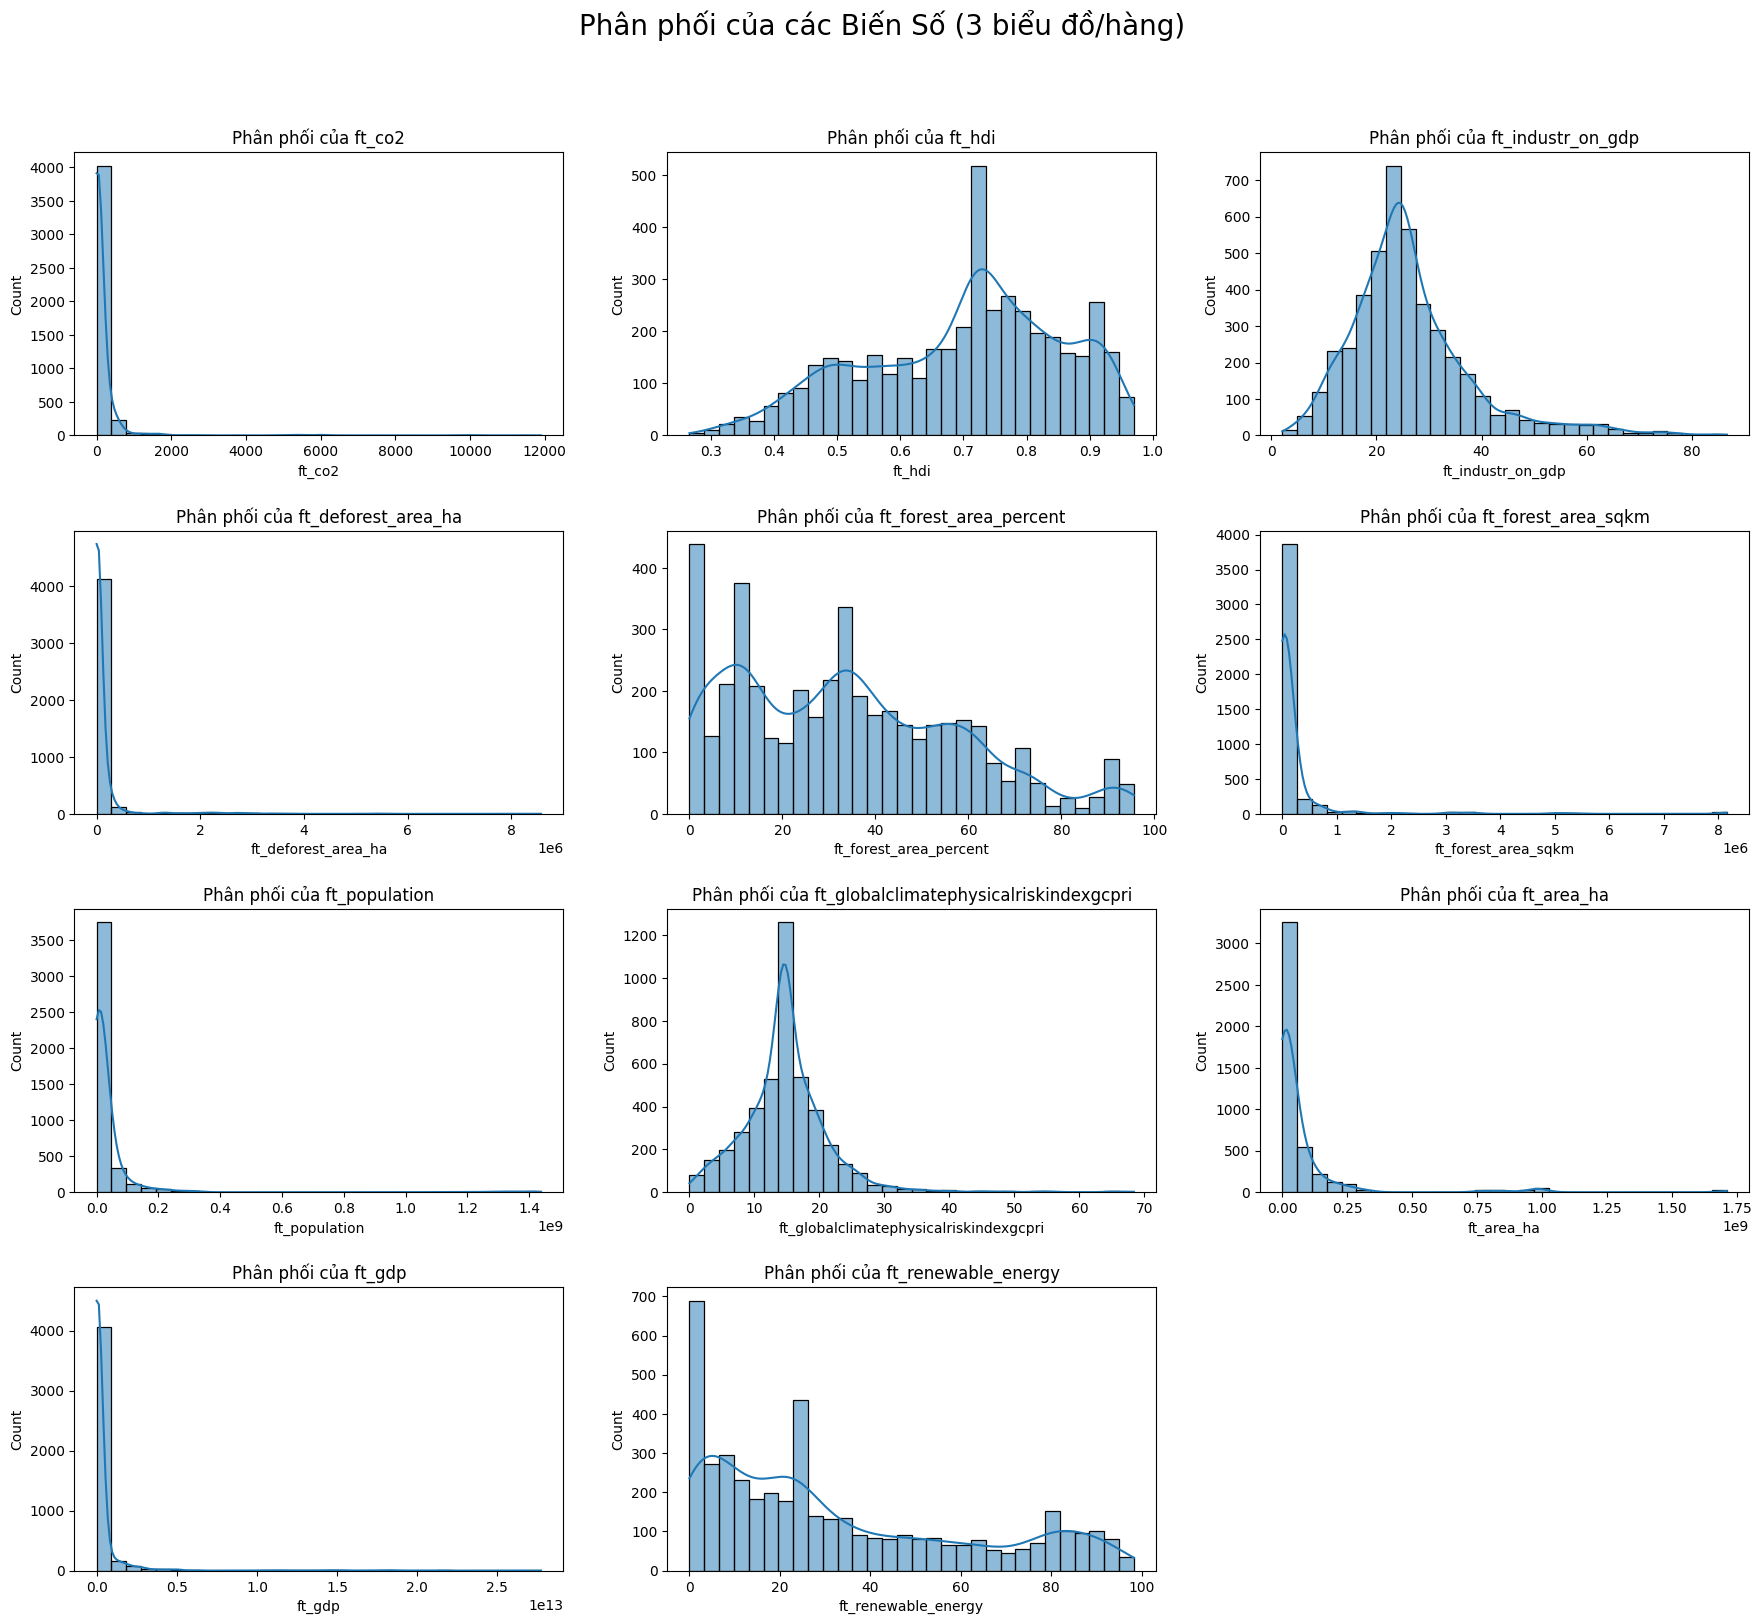

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Chọn các biến để phân tích
cols_to_analyze = [
    'ft_co2', 'ft_hdi', 'ft_industr_on_gdp', 'ft_deforest_area_ha',
    'ft_forest_area_percent', 'ft_forest_area_sqkm', 'ft_population',
    'ft_globalclimatephysicalriskindexgcpri', 'ft_area_ha', 'ft_gdp',
    'ft_renewable_energy'
]

# --- VẼ BIỂU ĐỒ HISTOGRAM ---
num_cols = 3
num_rows = math.ceil(len(cols_to_analyze) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten() # Chuyển thành mảng 1D để dễ lặp

fig.suptitle('Phân phối của các Biến Số (3 biểu đồ/hàng)', fontsize=20, y=1.02)

for i, col in enumerate(cols_to_analyze):
    sns.histplot(df_filled_missing[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Phân phối của {col}')

# Ẩn các ô biểu đồ không sử dụng
for j in range(len(cols_to_analyze), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

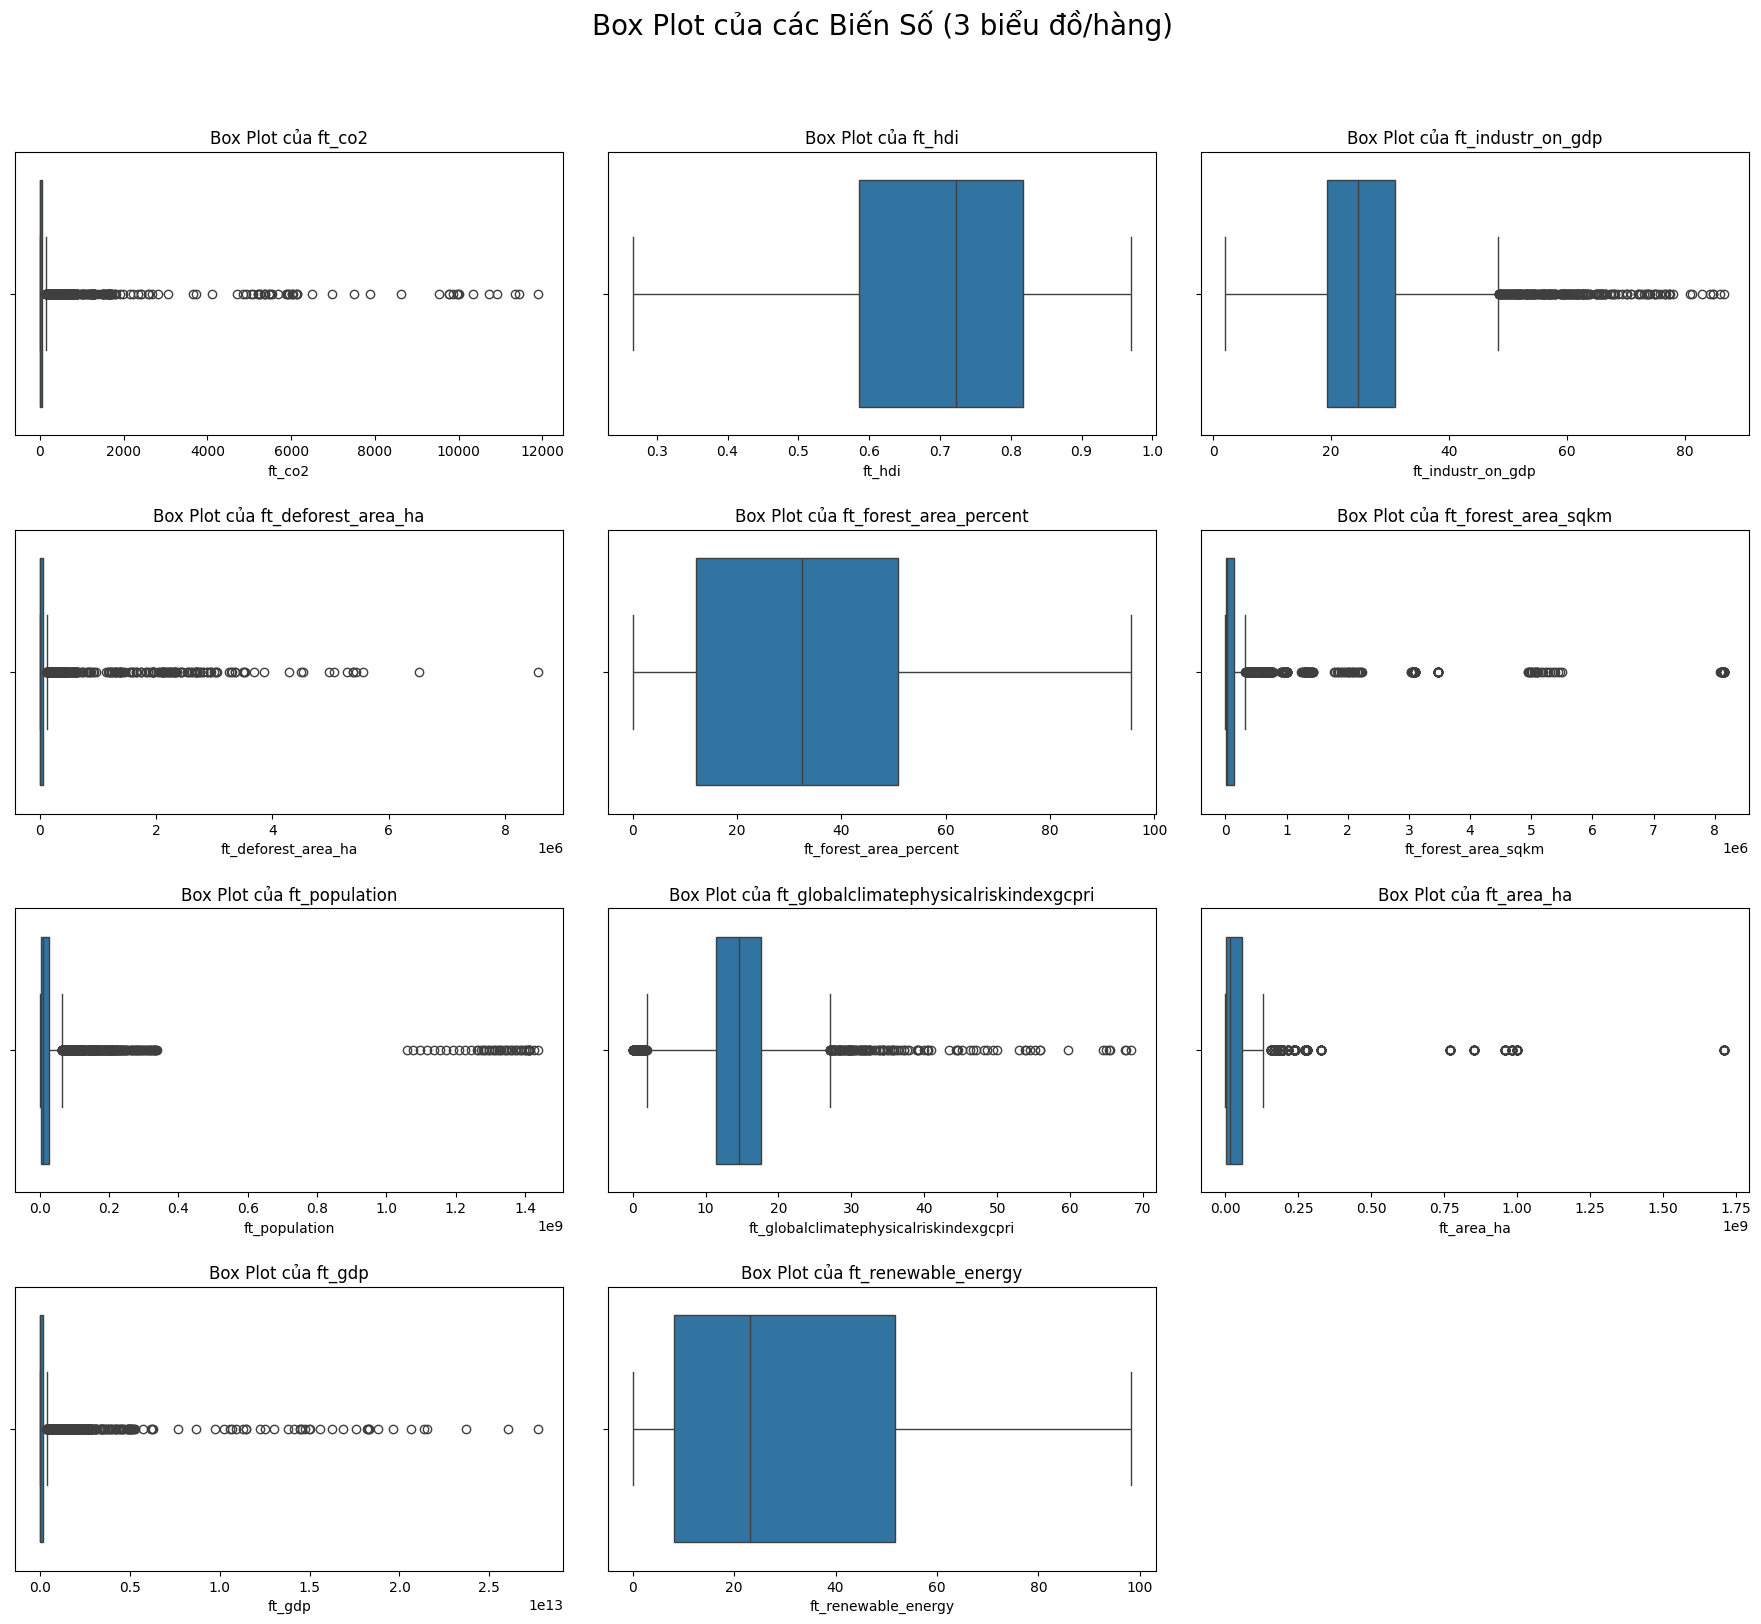

In [44]:
# --- VẼ BIỂU ĐỒ BOX PLOT ---
num_cols = 3
num_rows = math.ceil(len(cols_to_analyze) / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

fig.suptitle('Box Plot của các Biến Số (3 biểu đồ/hàng)', fontsize=20, y=1.02)

for i, col in enumerate(cols_to_analyze):
    sns.boxplot(x=df_filled_missing[col], ax=axes[i])
    axes[i].set_title(f'Box Plot của {col}')

# Ẩn các ô biểu đồ không sử dụng
for j in range(len(cols_to_analyze), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

# Phân tích Đa biến (Multivariate Analysis)

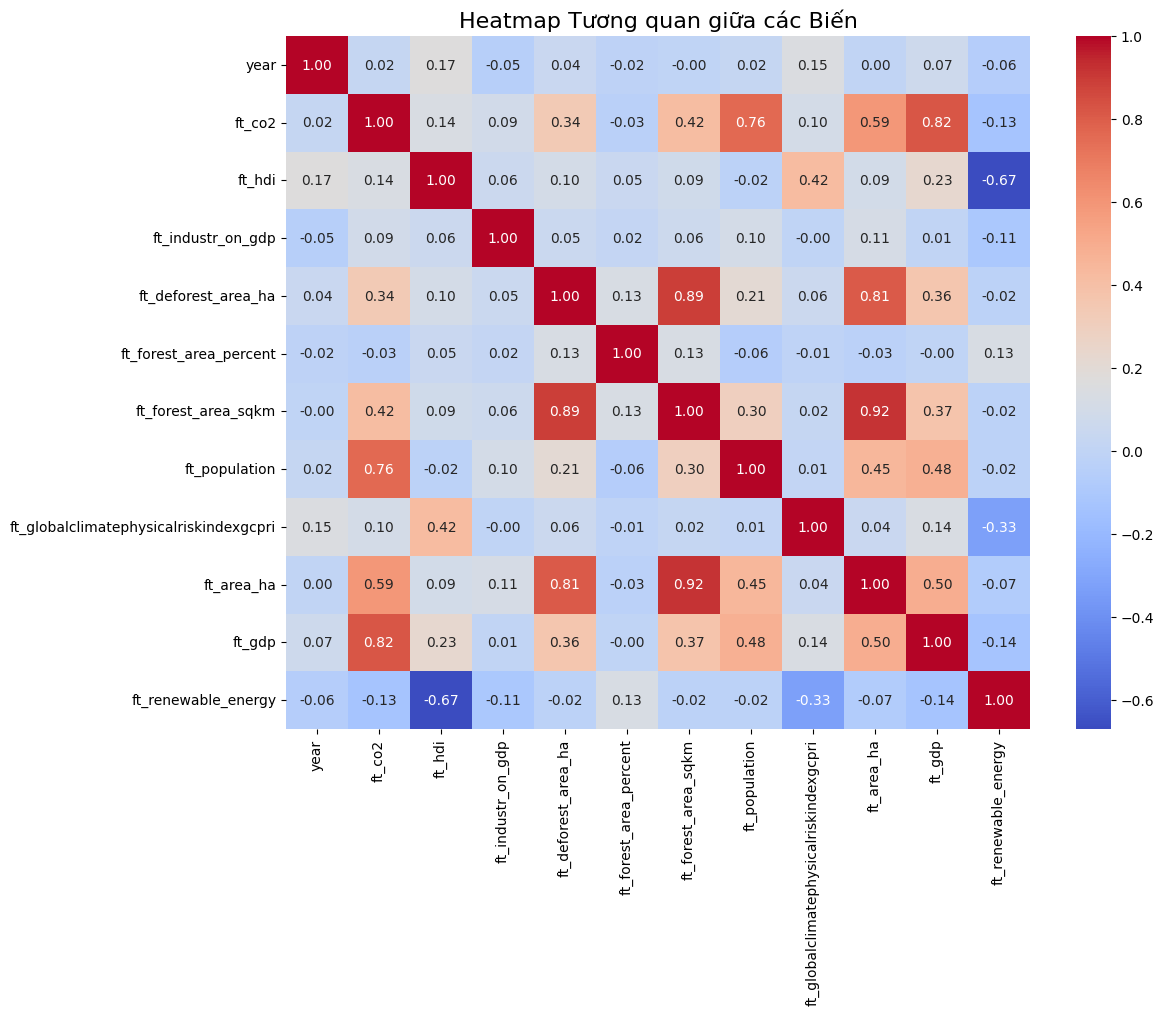

In [45]:
import numpy as np

# Chọn các cột số
numeric_cols = df_filled_missing.select_dtypes(include=np.number).columns

# Tính toán ma trận tương quan
corr_matrix = df_filled_missing[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Tương quan giữa các Biến', fontsize=16)
plt.show()

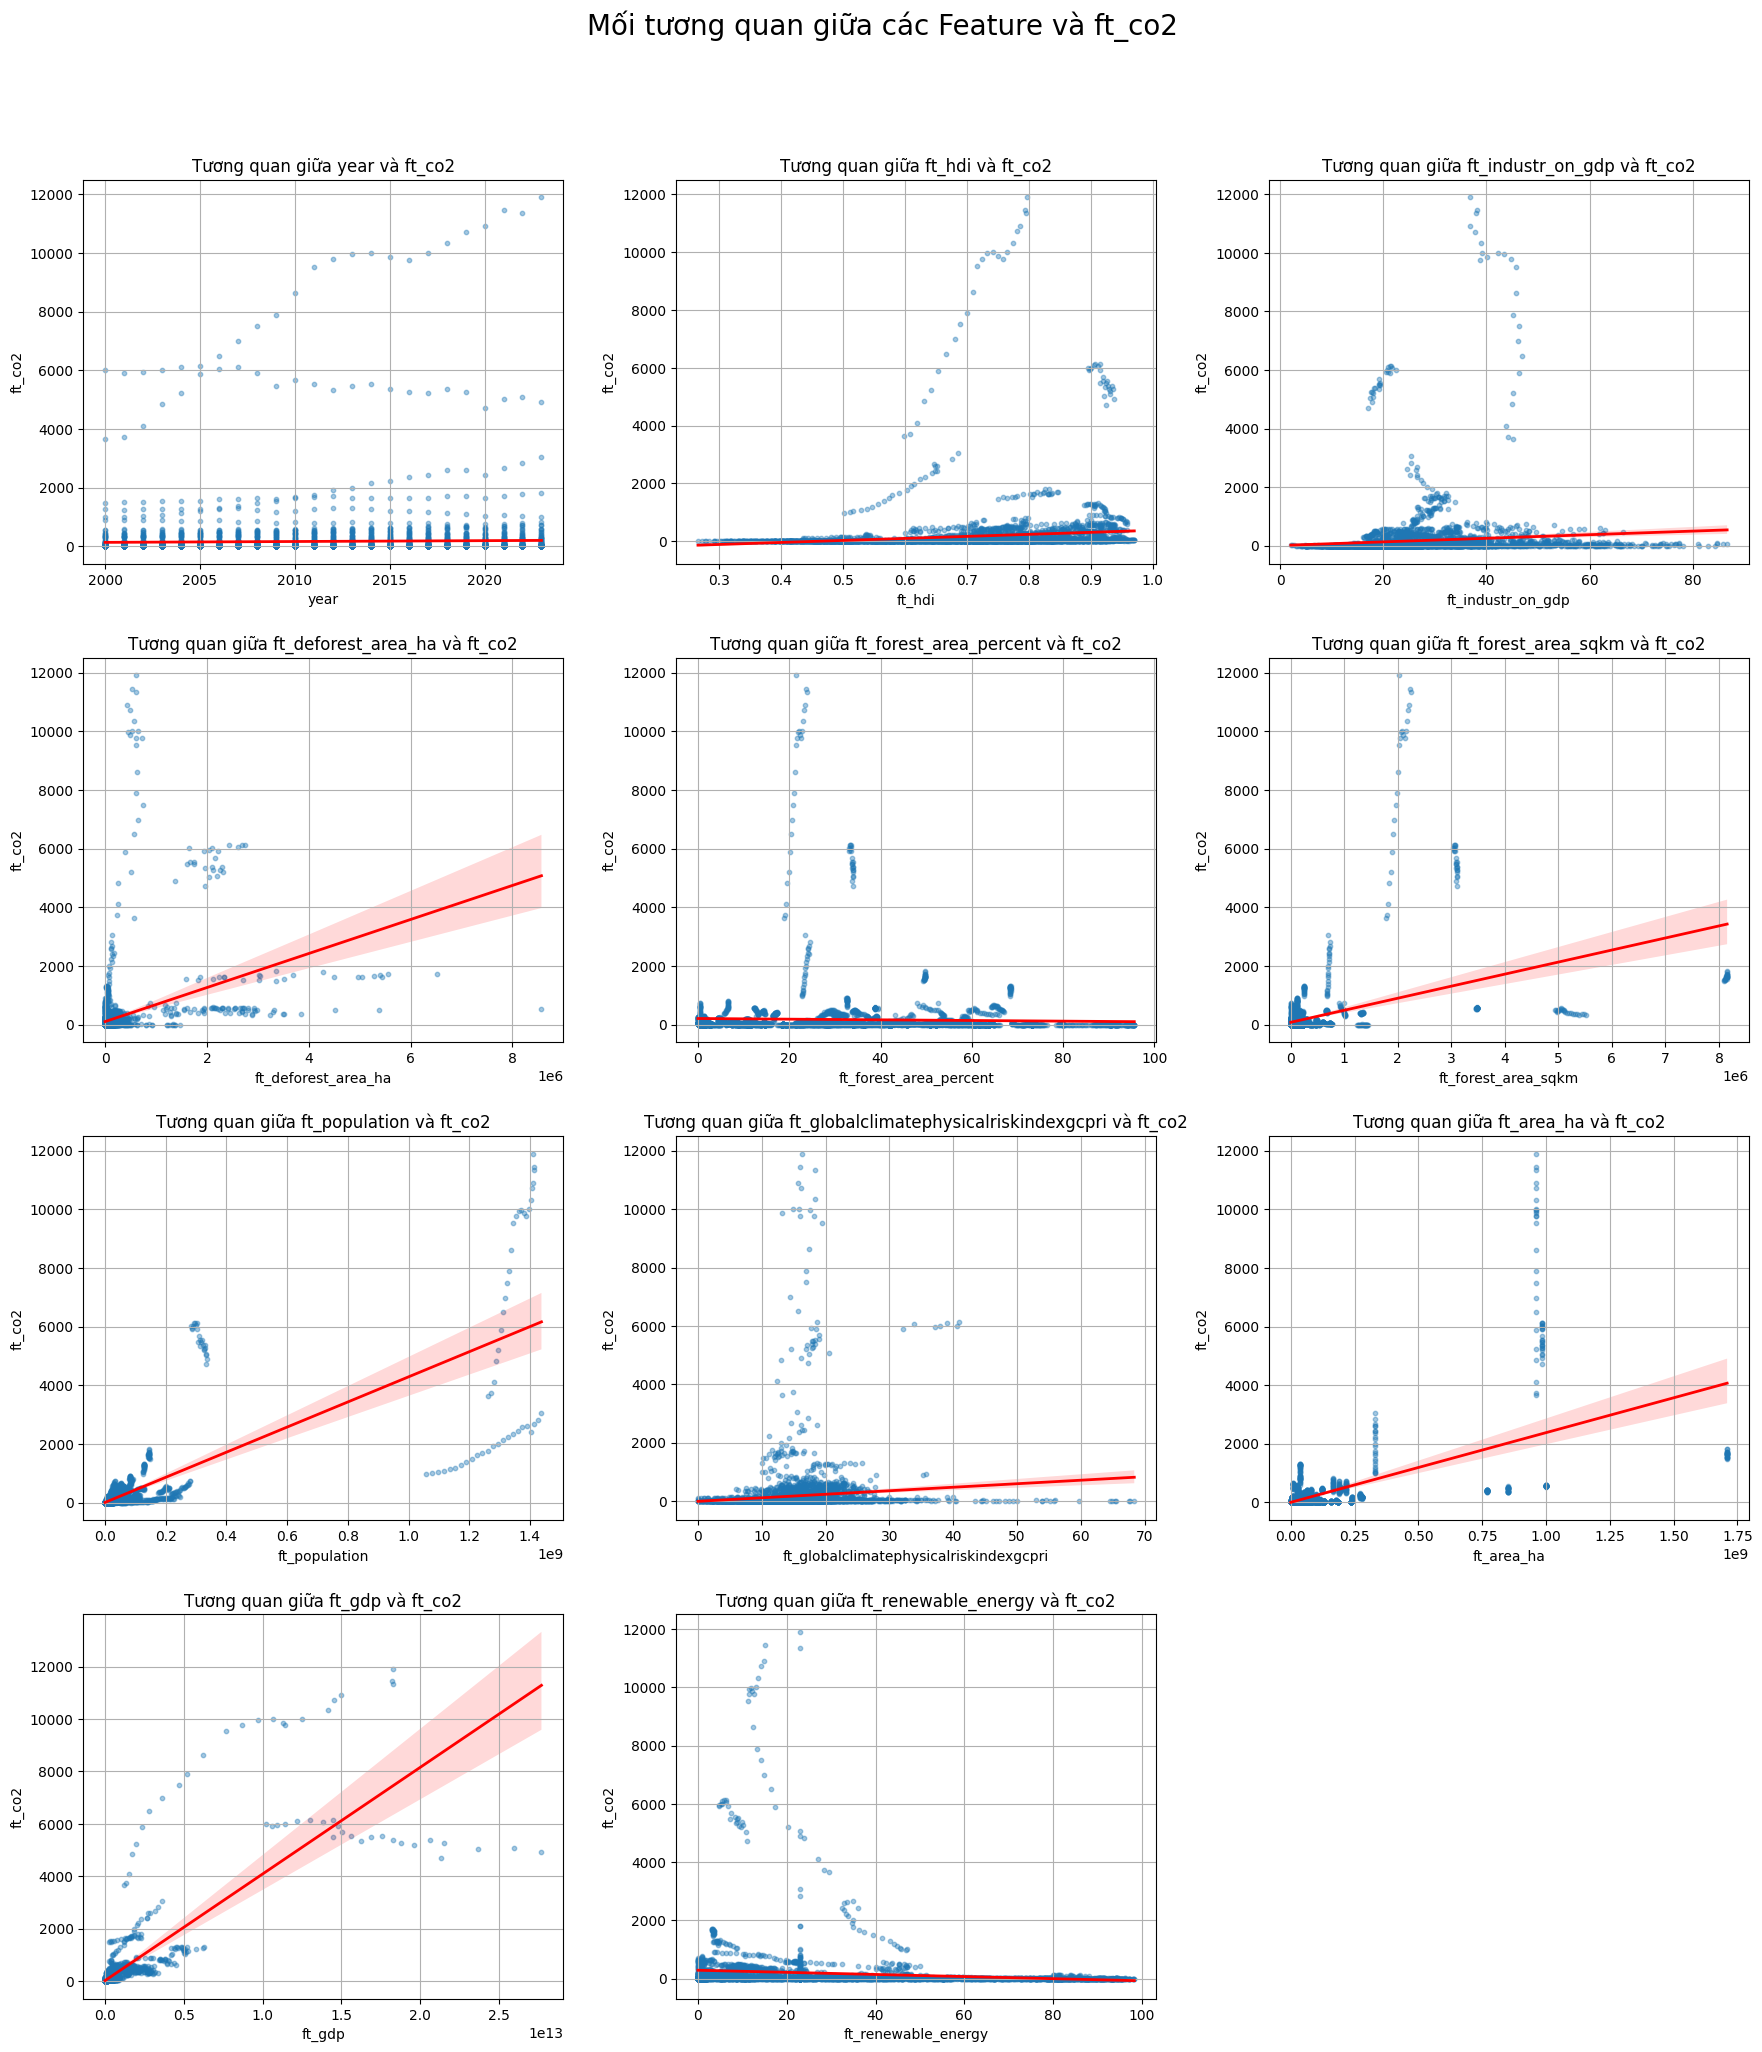

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

# Giả sử bạn đã có DataFrame df_filled_missing

# 1. Xác định biến mục tiêu và các biến đặc trưng
target_col = 'ft_co2'
feature_cols = df_filled_missing.select_dtypes(include=np.number).columns.drop(target_col).tolist()

# 2. Thiết lập lưới biểu đồ (subplot grid)
num_features = len(feature_cols)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
axes = axes.flatten()

# 3. Lặp qua từng feature và vẽ regplot với thang đo BÌNH THƯỜNG
for i, feature in enumerate(feature_cols):
    try:
        sns.regplot(
            data=df_filled_missing, # Sử dụng toàn bộ dataframe
            x=feature,
            y=target_col,
            ax=axes[i],
            scatter_kws={'alpha': 0.4, 's': 10},
            line_kws={'color': 'red', 'linewidth': 2}
        )

        # Bỏ các dòng set_xscale và set_yscale
        axes[i].set_title(f'Tương quan giữa {feature} và {target_col}', fontsize=12)
        axes[i].set_xlabel(feature) # Bỏ chữ "(log scale)"
        axes[i].set_ylabel(target_col) # Bỏ chữ "(log scale)"
        axes[i].grid(True)

    except Exception as e:
        axes[i].text(0.5, 0.5, f'Lỗi khi vẽ biểu đồ\ncho {feature}', ha='center', va='center')
        print(f"Lỗi khi vẽ biểu đồ cho {feature}: {e}")

# 4. Xóa các ô biểu đồ trống
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# 5. Tinh chỉnh và hiển thị
# Sửa lại tiêu đề chính
fig.suptitle(f'Mối tương quan giữa các Feature và {target_col}', fontsize=20, y=1.03)
plt.tight_layout(pad=2.0)
plt.show()

In [47]:
import pandas as pd
import numpy as np

target_col = 'ft_co2'

# 1. Đảm bảo chỉ lấy các cột kiểu số
numeric_df = df_filled_missing.select_dtypes(include=np.number)

# 2. Tính toán ma trận tương quan (Pearson's correlation)
corr_matrix = numeric_df.corr()

# 3. Lấy ra cột tương quan của 'ft_co2' với các feature khác
corr_with_target = corr_matrix[target_col]

# 4. Chuyển thành DataFrame để dễ nhìn và sắp xếp
corr_table = pd.DataFrame(corr_with_target)
corr_table = corr_table.reset_index()
corr_table.columns = ['Feature', 'Correlation']

# 5. Tạo cột giá trị tuyệt đối để sắp xếp (vì -0.9 mạnh hơn 0.5)
corr_table['Absolute_Correlation'] = corr_table['Correlation'].abs()

# 6. Sắp xếp các feature theo mức độ ảnh hưởng (tuyệt đối) giảm dần
top_influences = corr_table.sort_values(by='Absolute_Correlation', ascending=False)

# 7. Loại bỏ hàng 'ft_co2' (vì nó luôn tương quan 1.0 với chính nó)
top_influences = top_influences[top_influences['Feature'] != target_col]

# 8. Reset index và dọn dẹp bảng
top_influences = top_influences[['Feature', 'Correlation']].reset_index(drop=True)

# 9. In bảng kết quả

print(top_influences.to_string())

                                   Feature  Correlation
0                                   ft_gdp     0.819291
1                            ft_population     0.761945
2                               ft_area_ha     0.590741
3                      ft_forest_area_sqkm     0.418036
4                      ft_deforest_area_ha     0.340753
5                                   ft_hdi     0.137290
6                      ft_renewable_energy    -0.131580
7   ft_globalclimatephysicalriskindexgcpri     0.101254
8                        ft_industr_on_gdp     0.091218
9                   ft_forest_area_percent    -0.033928
10                                    year     0.024972
